In [1]:
import pandas as pd

# Import Dataset

In [2]:
# import df_RCT.csv as df
df = pd.read_csv('df_RCT.csv')
# Display the first few rows of the dataset
print(df.head())

   record_id  covid_group  interventiongroup  mmrc_score  pcfs_score  \
0          1          1.0                1.0         2.0         2.0   
1          1          1.0                1.0         0.0         1.0   
2          2          1.0                0.0         2.0         2.0   
3          2          1.0                0.0         2.0         2.0   
4          3          1.0                1.0         4.0         4.0   

  subject_dob subject_gender subject_ethnicity  health_smoking  \
0  1992-04-16         Female            Latino             0.0   
1         NaN            NaN               NaN             NaN   
2  1940-03-13         Female             White             0.0   
3         NaN            NaN               NaN             NaN   
4  1976-11-24         Female          Hispanic             NaN   

     health_history  ... tdi_sum  odi_sum  ndi_sum  anxiety_sum  \
0       hypothyroid  ...     0.0      7.0      9.0          3.0   
1               NaN  ...     9.0    

## Select Outcome Measures

In [3]:
outcome_measures = {
    # Vascular measures
    'fmd_percent': {'name': 'Flow-Mediated Dilation', 'unit': '%'},
    
    # CPET Measures
    'cpet_vo2peak_relative': {'name': 'VO2 Peak', 'unit': 'mL/kg/min'},
    
    
    # Fatigue/Brain Fog Measures
    'fss_sum': {'name': 'Fatigue Severity', 'unit': ''},
    'dsq_sum': {'name': 'Post-Exertional Malaise (DSQ)', 'unit': ''},
    'woods_sum': {'name': 'Mental Fatigue', 'unit': ''},
    'vas_fatiguebest': {'name': 'VAS Fatigue - Best', 'unit': ''},
    'vas_fatigueworst': {'name': 'VAS Fatigue - Worst', 'unit': ''},
    'vas_fatiguecurrent': {'name': 'VAS Fatigue - Current', 'unit': ''},

    # Sleep Measures
    'psqi_sum': {'name': 'PSQI Total', 'unit': ''},
    'psqi_quality': {'name': 'PSQI Sleep Quality', 'unit': ''},
    'psqi_latency': {'name': 'PSQI Sleep Latency', 'unit': ''},
    'psqi_duration': {'name': 'PSQI Sleep Duration', 'unit': ''},
    'psqi_efficiency': {'name': 'PSQI Sleep Efficiency', 'unit': ''},
    'psqi_disturbances': {'name': 'PSQI Sleep Disturbances', 'unit': ''},
    'psqi_medication': {'name': 'PSQI Sleep Medication', 'unit': ''},
    'psqi_dysfunction': {'name': 'PSQI Daytime Dysfunction', 'unit': ''},

    # Dyspnea Measures
     'mmrc_score': {'name': 'MMRC', 'unit': ''},

     # MSK Measures
    'odi_sum': {'name': 'Oswestry Disability Index (Sum)', 'unit': ''},
    'ndi_sum': {'name': 'Neck Disability Index (Sum)', 'unit': ''},
    'vas_backpainbest': {'name': 'VAS Back Pain - Best', 'unit': ''},
    'vas_backpainworst': {'name': 'VAS Back Pain - Worst', 'unit': ''},
    'vas_backpaincurrent': {'name': 'VAS Back Pain - Current', 'unit': ''},
    'vas_neckpainbest': {'name': 'VAS Neck Pain - Best', 'unit': ''},
    'vas_neckpainworst': {'name': 'VAS Neck Pain - Worst', 'unit': ''},
    'vas_neckpaincurrent': {'name': 'VAS Neck Pain - Current', 'unit': ''},
    'vas_myalgiabest': {'name': 'VAS Myalgia - Best', 'unit': ''},
    'vas_myalgiaworst': {'name': 'VAS Myalgia - Worst', 'unit': ''},
    'vas_myalgiacurrent': {'name': 'VAS Myalgia - Current', 'unit': ''},
    'vas_dizzybest': {'name': 'VAS Dizzy - Best', 'unit': ''},
    'vas_dizzyworst': {'name': 'VAS Dizzy - Worst', 'unit': ''},
    'vas_dizzycurrent': {'name': 'VAS Dizzy - Current', 'unit': ''},

    # Functional Activity Measures
    'sfpa_sum': {'name': 'SFPA Sum', 'unit': ''}, 
    'pcfs_score': {'name': 'PCFS', 'unit': ''},
    'eq_vas': {'name': 'Quality of Life (EQ)', 'unit': ''},

    # Psychological Measures
    'anxiety_sum': {'name': 'Anxiety Sum', 'unit': ''},
    'anxiety_dichotomous': {'name': 'Anxiety Dichotomous', 'unit': ''},
    'depression_sum': {'name': 'Depression Sum', 'unit': ''},
    'depression_dichotomous': {'name': 'Depression Dichotomous', 'unit': ''},
    'ptsd_sum': {'name': 'PTSD Sum', 'unit': ''},
    'ptsd_dichotomous': {'name': 'PTSD Dichotomous', 'unit': ''},
    
    # Respiratory measures (treating pre and post separately)
    'mip_pre_max': {'name': 'MIP Max (Pre)', 'unit': 'cmH2O'},
    'mip_post_max': {'name': 'MIP Max (Post)', 'unit': 'cmH2O'},
    'mip_max_fatigue': {'name': 'MIP Max Fatigue', 'unit': 'cmH2O'},
    'mip_max_fatigue_percent': {'name': 'MIP Max Fatigue (%)', 'unit': '%'},
    'smip_pre_max': {'name': 'SMIP Max (Pre)', 'unit': 'cmH2O'},
    'smip_post_max': {'name': 'SMIP Max (Post)', 'unit': 'cmH2O'},
    'smip_max_fatigue': {'name': 'SMIP Max Fatigue', 'unit': 'cmH2O'},
    'smip_max_fatigue_percent': {'name': 'SMIP Max Fatigue (%)', 'unit': '%'},
    'pif_pre_max': {'name': 'PIF Max (Pre)', 'unit': 'cmH2O'},
    'pif_post_max': {'name': 'PIF Max (Post)', 'unit': 'cmH2O'},
    'pif_max_fatigue': {'name': 'PIF Max Fatigue', 'unit': 'cmH2O'},
    'pif_max_fatigue_percent': {'name': 'PIF Max Fatigue (%)', 'unit': '%'},
    'sindex_pre_max': {'name': 'SIndex Max (Pre)', 'unit': 'cmH2O'},
    'sindex_post_max': {'name': 'SIndex Max (Post)', 'unit': 'cmH2O'},
    'sindex_max_fatigue': {'name': 'SIndex Max Fatigue', 'unit': 'cmH2O'},
    'sindex_max_fatigue_percent': {'name': 'SIndex Max Fatigue (%)', 'unit': '%'},

    # Autonomic Measures
    'hrv_sdnn': {'name': 'HRV SDNN', 'unit': 'ms'},
    'hrv_rmssd': {'name': 'HRV RMSSD', 'unit': 'ms'},
    'hrv_heartrate': {'name': 'Heart Rate', 'unit': 'bpm'},
    'hrv_lf': {'name': 'HRV LF Power', 'unit': 'ms²'},
    'hrv_hf': {'name': 'HRV HF Power', 'unit': 'ms²'},
    'hrv_lfhf': {'name': 'HRV LF/HF Ratio', 'unit': ''},
    'cpet_hrr1': {'name': 'HRR 1', 'unit': 'BPM'},
    'cpet_hrr2': {'name': 'HRR 2', 'unit': 'BPM'},
    'cpet_chronindex': {'name': 'Chronotropic Index (CI)', 'unit': ''},
}


In [ ]:
  *# Respiratory strength measures — PRE
    'mip_pre_max': {'name': 'MIP Max (Pre)', 'unit': 'cmH2O'},
    'mip_pre_min': {'name': 'MIP Min (Pre)', 'unit': 'cmH2O'},
    'mip_pre_mean': {'name': 'MIP Mean (Pre)', 'unit': 'cmH2O'},
    'fit_pre_max': {'name': 'FIT Max (Pre)', 'unit': 'cmH2O'},
    'fit_pre_min': {'name': 'FIT Min (Pre)', 'unit': 'cmH2O'},
    'fit_pre_mean': {'name': 'FIT Mean (Pre)', 'unit': 'cmH2O'},
    'smip_pre_max': {'name': 'SMIP Max (Pre)', 'unit': 'cmH2O'},
    'smip_pre_min': {'name': 'SMIP Min (Pre)', 'unit': 'cmH2O'},
    'smip_pre_mean': {'name': 'SMIP Mean (Pre)', 'unit': 'cmH2O'},
    'pif_pre_max': {'name': 'PIF Max (Pre)', 'unit': 'cmH2O'},
    'pif_pre_min': {'name': 'PIF Min (Pre)', 'unit': 'cmH2O'},
    'pif_pre_mean': {'name': 'PIF Mean (Pre)', 'unit': 'cmH2O'},
    'sindex_pre_max': {'name': 'SIndex Max (Pre)', 'unit': 'cmH2O'},
    'sindex_pre_min': {'name': 'SIndex Min (Pre)', 'unit': 'cmH2O'},
    'sindex_pre_mean': {'name': 'SIndex Mean (Pre)', 'unit': 'cmH2O'},
    'volume_pre_max': {'name': 'Volume Max (Pre)', 'unit': 'L'},
    'volume_pre_min': {'name': 'Volume Min (Pre)', 'unit': 'L'},
    'volume_pre_mean': {'name': 'Volume Mean (Pre)', 'unit': 'L'},

    # Respiratory strength measures — POST
    'mip_post_max': {'name': 'MIP Max (Post)', 'unit': 'cmH2O'},
    'mip_post_min': {'name': 'MIP Min (Post)', 'unit': 'cmH2O'},
    'mip_post_mean': {'name': 'MIP Mean (Post)', 'unit': 'cmH2O'},
    'fit_post_max': {'name': 'FIT Max (Post)', 'unit': 'cmH2O'},
    'fit_post_min': {'name': 'FIT Min (Post)', 'unit': 'cmH2O'},
    'fit_post_mean': {'name': 'FIT Mean (Post)', 'unit': 'cmH2O'},
    'smip_post_max': {'name': 'SMIP Max (Post)', 'unit': 'cmH2O'},
    'smip_post_min': {'name': 'SMIP Min (Post)', 'unit': 'cmH2O'},
    'smip_post_mean': {'name': 'SMIP Mean (Post)', 'unit': 'cmH2O'},
    'pif_post_max': {'name': 'PIF Max (Post)', 'unit': 'cmH2O'},
    'pif_post_min': {'name': 'PIF Min (Post)', 'unit': 'cmH2O'},
    'pif_post_mean': {'name': 'PIF Mean (Post)', 'unit': 'cmH2O'},
    'sindex_post_max': {'name': 'SIndex Max (Post)', 'unit': 'cmH2O'},
    'sindex_post_min': {'name': 'SIndex Min (Post)', 'unit': 'cmH2O'},
    'sindex_post_mean': {'name': 'SIndex Mean (Post)', 'unit': 'cmH2O'},
    'volume_post_max': {'name': 'Volume Max (Post)', 'unit': 'L'},
    'volume_post_min': {'name': 'Volume Min (Post)', 'unit': 'L'},
    'volume_post_mean': {'name': 'Volume Mean (Post)', 'unit': 'L'},

    # Respiratory strength measures — FATIGUE and FATIGUE PERCENT
    'mip_max_fatigue': {'name': 'MIP Max Fatigue', 'unit': 'cmH2O'},
    'mip_max_fatigue_percent': {'name': 'MIP Max Fatigue (%)', 'unit': '%'},
    'mip_min_fatigue': {'name': 'MIP Min Fatigue', 'unit': 'cmH2O'},
    'mip_min_fatigue_percent': {'name': 'MIP Min Fatigue (%)', 'unit': '%'},
    'mip_mean_fatigue': {'name': 'MIP Mean Fatigue', 'unit': 'cmH2O'},
    'mip_mean_fatigue_percent': {'name': 'MIP Mean Fatigue (%)', 'unit': '%'},

    'fit_max_fatigue': {'name': 'FIT Max Fatigue', 'unit': 'cmH2O'},
    'fit_max_fatigue_percent': {'name': 'FIT Max Fatigue (%)', 'unit': '%'},
    'fit_min_fatigue': {'name': 'FIT Min Fatigue', 'unit': 'cmH2O'},
    'fit_min_fatigue_percent': {'name': 'FIT Min Fatigue (%)', 'unit': '%'},
    'fit_mean_fatigue': {'name': 'FIT Mean Fatigue', 'unit': 'cmH2O'},
    'fit_mean_fatigue_percent': {'name': 'FIT Mean Fatigue (%)', 'unit': '%'},

    'smip_max_fatigue': {'name': 'SMIP Max Fatigue', 'unit': 'cmH2O'},
    'smip_max_fatigue_percent': {'name': 'SMIP Max Fatigue (%)', 'unit': '%'},
    'smip_min_fatigue': {'name': 'SMIP Min Fatigue', 'unit': 'cmH2O'},
    'smip_min_fatigue_percent': {'name': 'SMIP Min Fatigue (%)', 'unit': '%'},
    'smip_mean_fatigue': {'name': 'SMIP Mean Fatigue', 'unit': 'cmH2O'},
    'smip_mean_fatigue_percent': {'name': 'SMIP Mean Fatigue (%)', 'unit': '%'},

    'pif_max_fatigue': {'name': 'PIF Max Fatigue', 'unit': 'cmH2O'},
    'pif_max_fatigue_percent': {'name': 'PIF Max Fatigue (%)', 'unit': '%'},
    'pif_min_fatigue': {'name': 'PIF Min Fatigue', 'unit': 'cmH2O'},
    'pif_min_fatigue_percent': {'name': 'PIF Min Fatigue (%)', 'unit': '%'},
    'pif_mean_fatigue': {'name': 'PIF Mean Fatigue', 'unit': 'cmH2O'},
    'pif_mean_fatigue_percent': {'name': 'PIF Mean Fatigue (%)', 'unit': '%'},

    'sindex_max_fatigue': {'name': 'SIndex Max Fatigue', 'unit': 'cmH2O'},
    'sindex_max_fatigue_percent': {'name': 'SIndex Max Fatigue (%)', 'unit': '%'},
    'sindex_min_fatigue': {'name': 'SIndex Min Fatigue', 'unit': 'cmH2O'},
    'sindex_min_fatigue_percent': {'name': 'SIndex Min Fatigue (%)', 'unit': '%'},
    'sindex_mean_fatigue': {'name': 'SIndex Mean Fatigue', 'unit': 'cmH2O'},
    'sindex_mean_fatigue_percent': {'name': 'SIndex Mean Fatigue (%)', 'unit': '%'},

    'volume_max_fatigue': {'name': 'Volume Max Fatigue', 'unit': 'L'},
    'volume_max_fatigue_percent': {'name': 'Volume Max Fatigue (%)', 'unit': '%'},
    'volume_min_fatigue': {'name': 'Volume Min Fatigue', 'unit': 'L'},
    'volume_min_fatigue_percent': {'name': 'Volume Min Fatigue (%)', 'unit': '%'},
    'volume_mean_fatigue': {'name': 'Volume Mean Fatigue', 'unit': 'L'},
    'volume_mean_fatigue_percent': {'name': 'Volume Mean Fatigue (%)', 'unit': '%'},



}

# Split Plot ANOVA

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


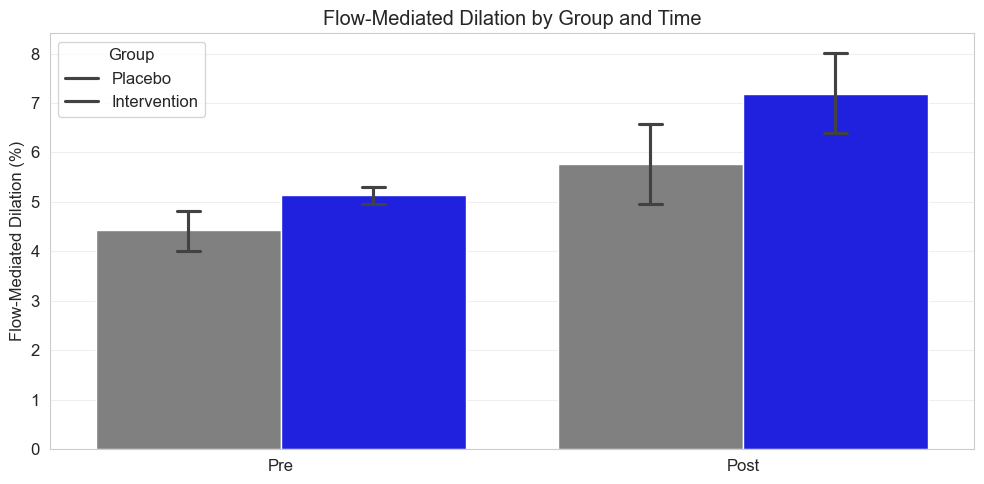

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


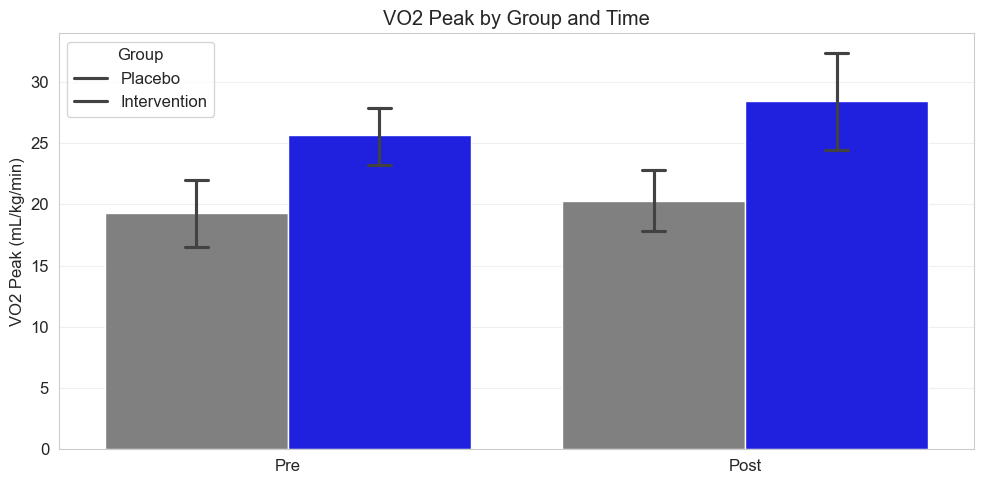

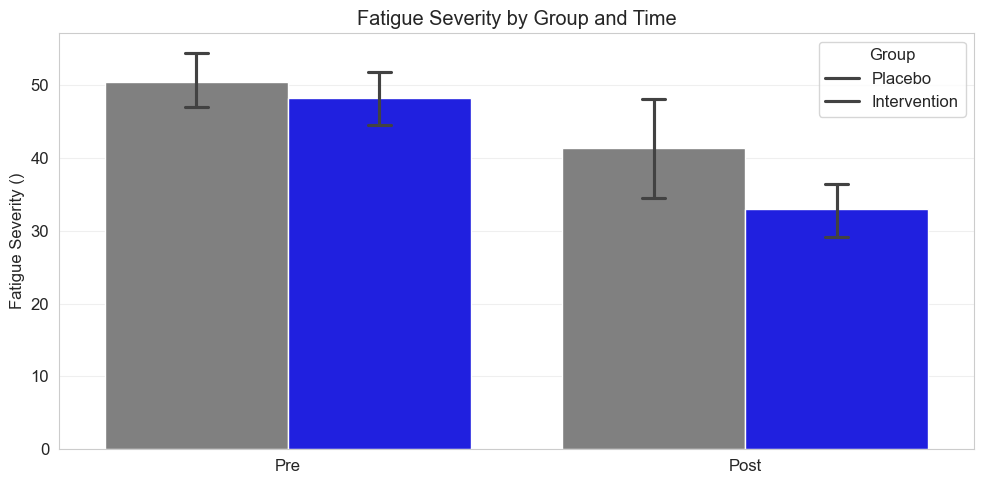

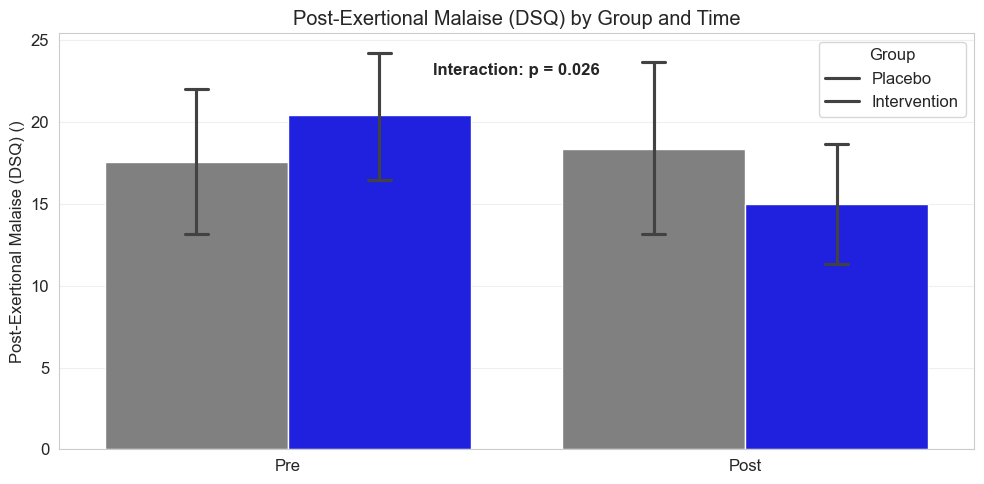

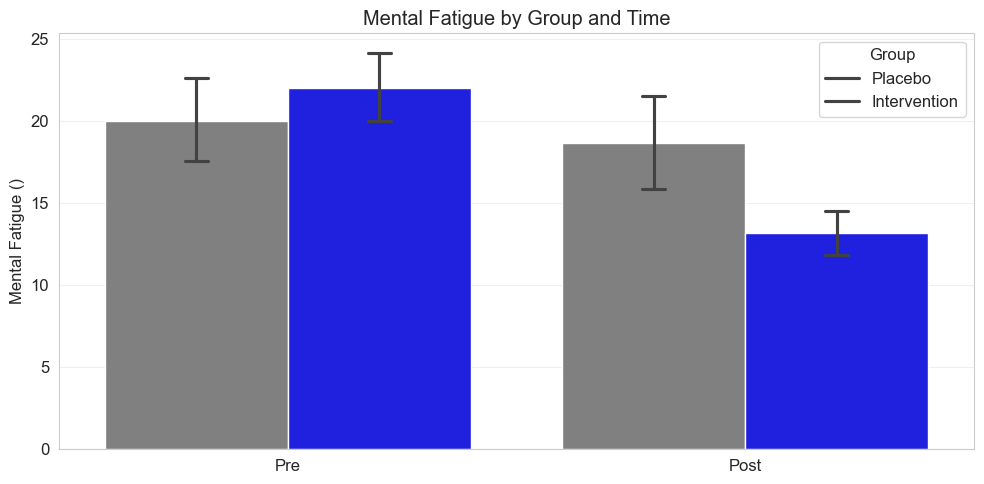

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


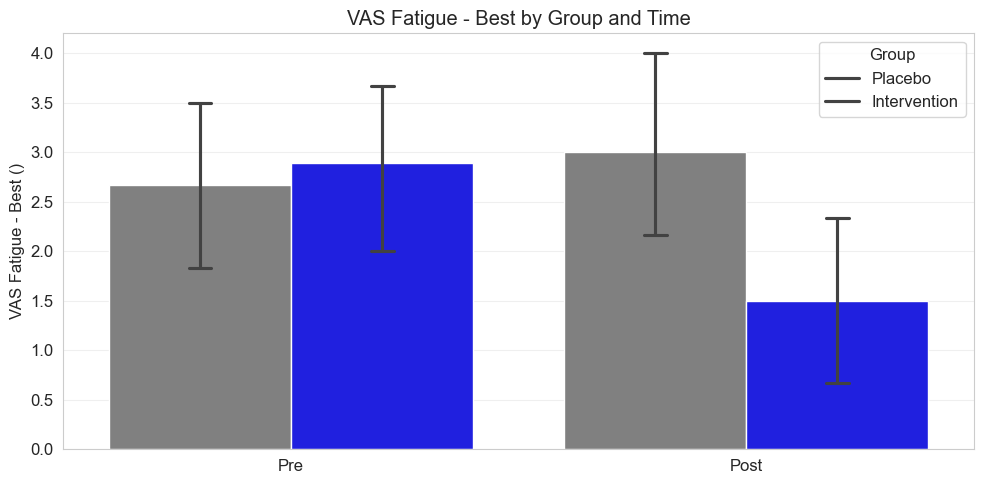

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


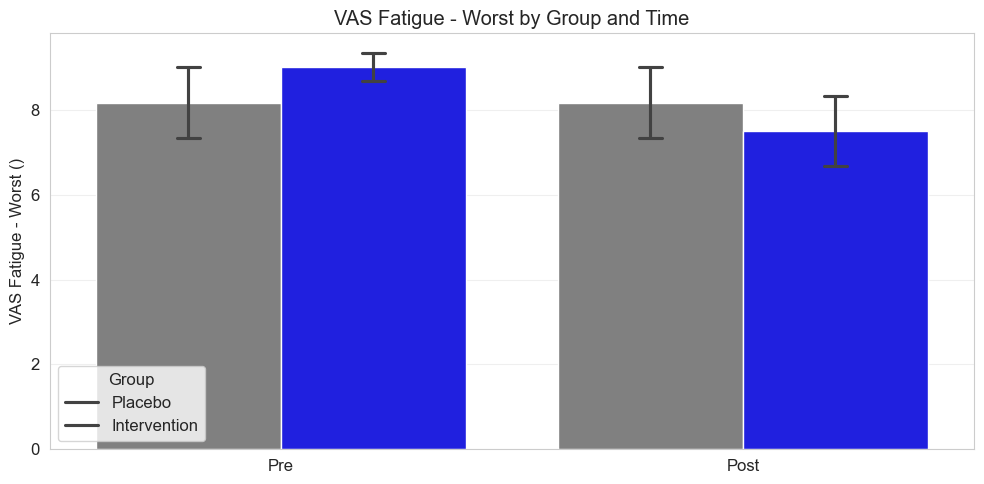

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


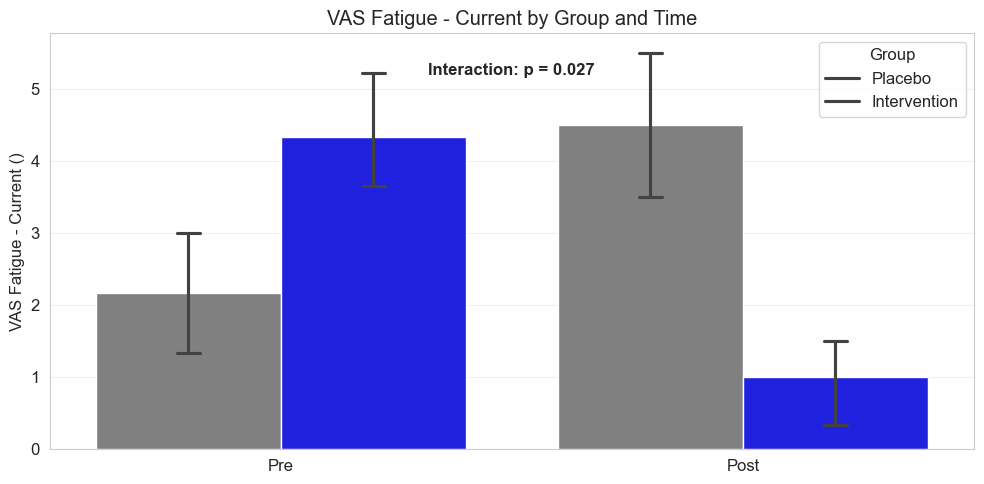

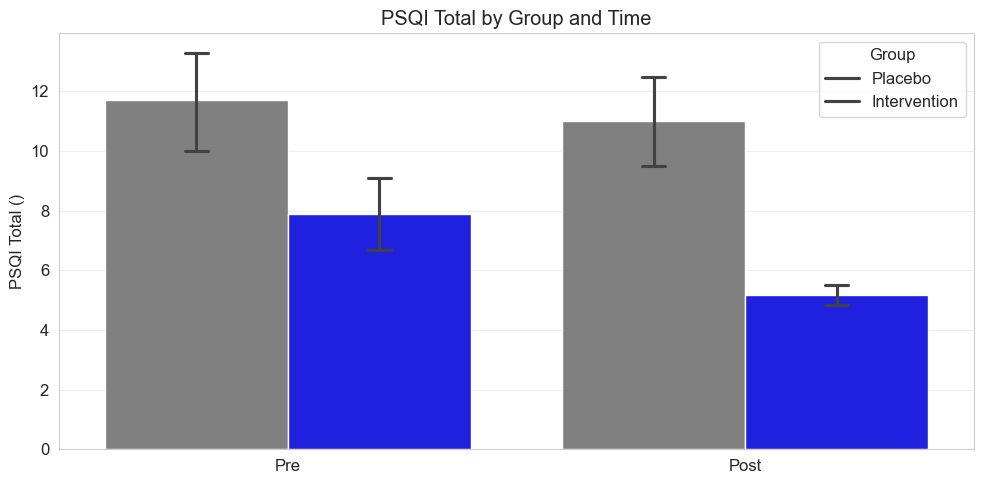

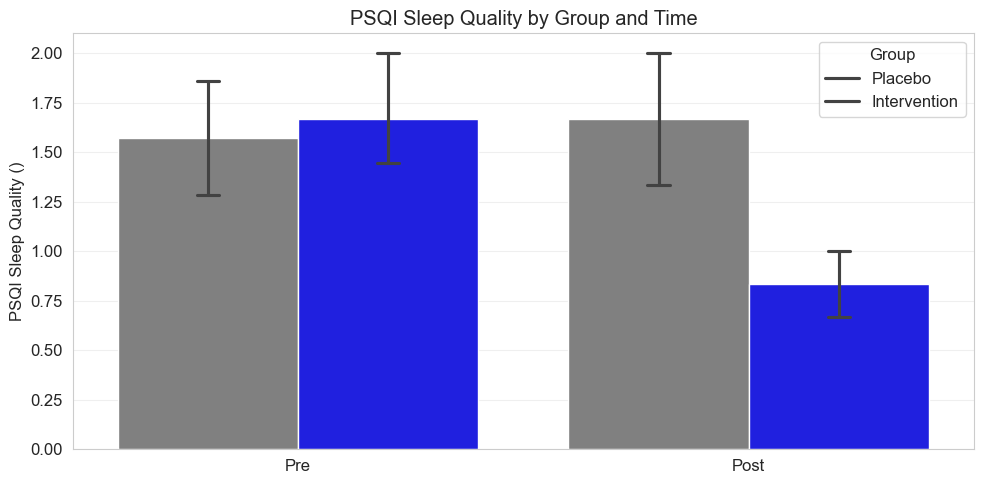

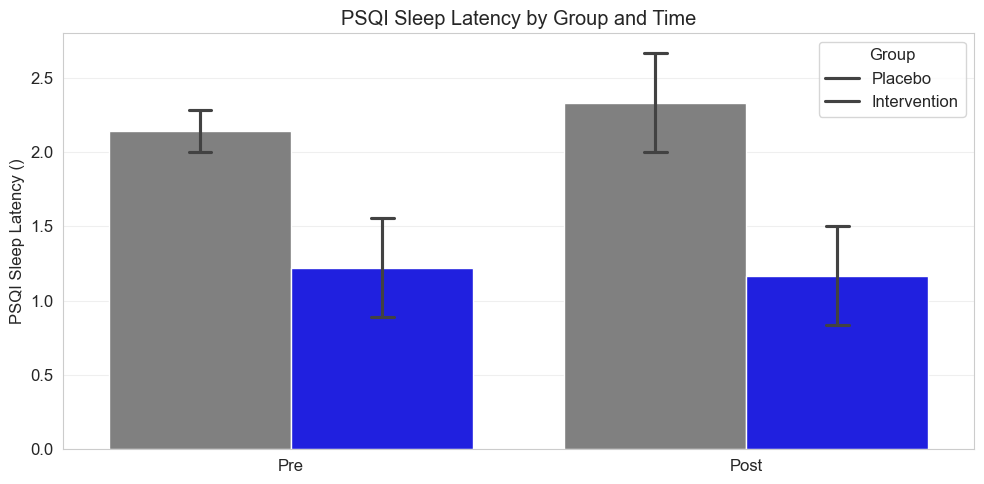

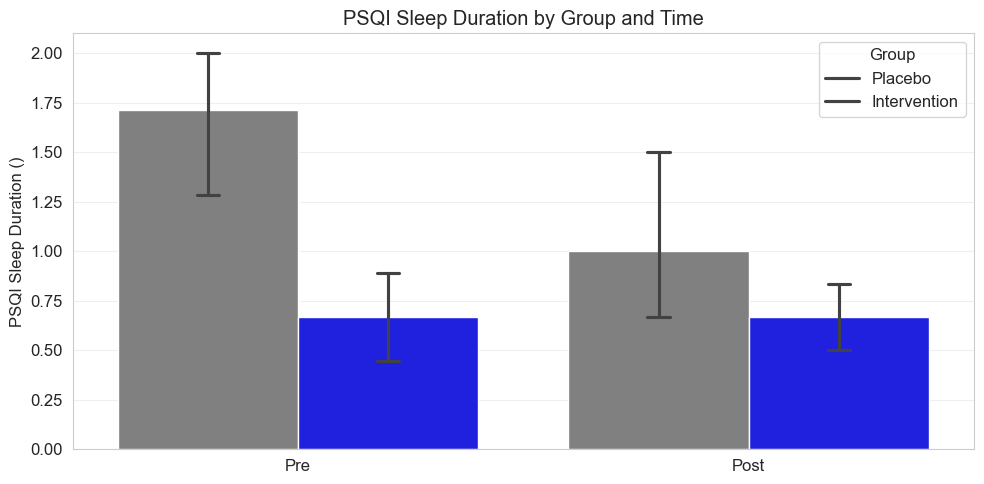

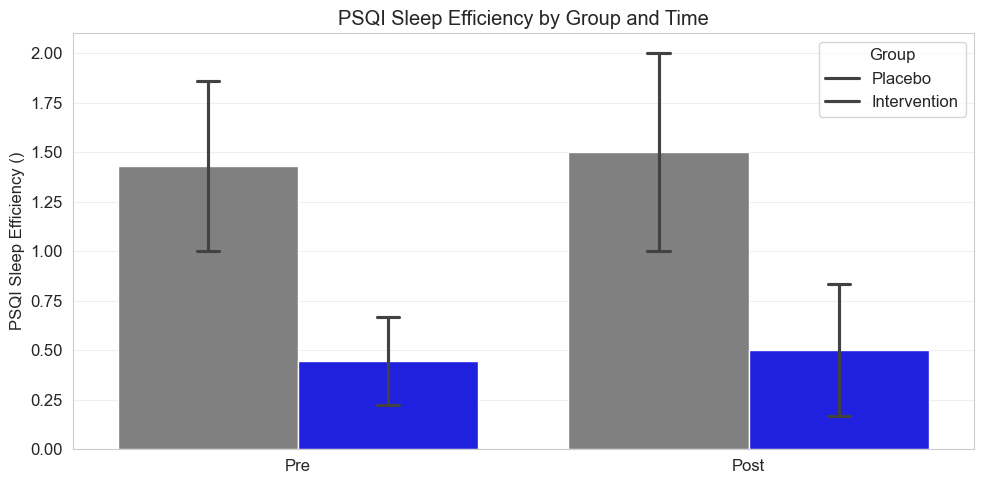

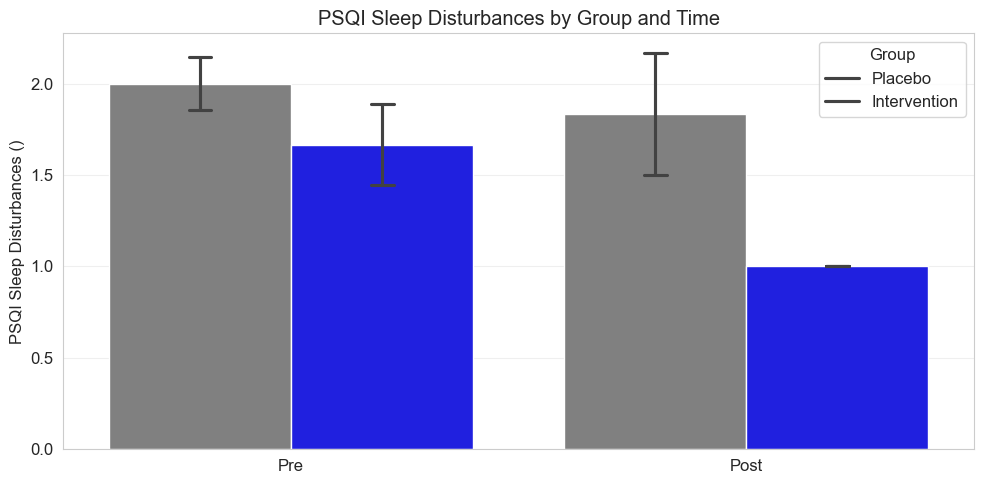

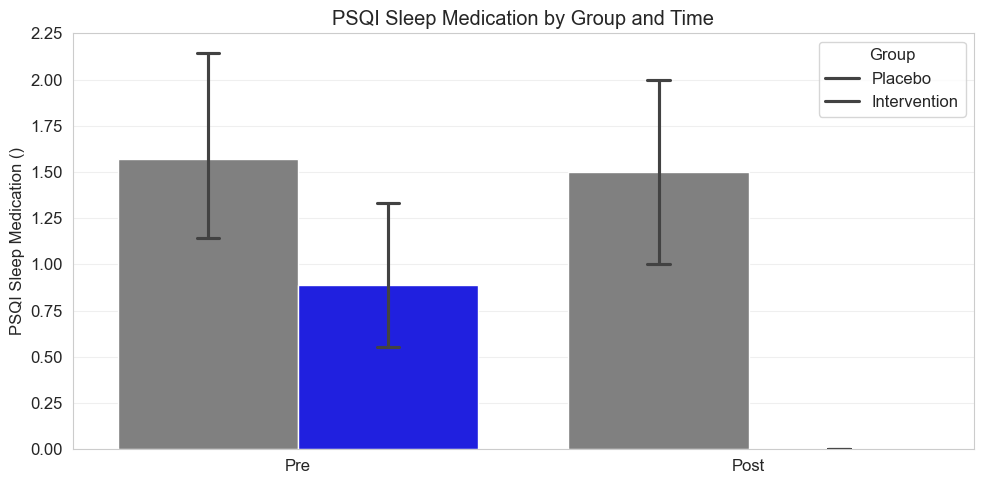

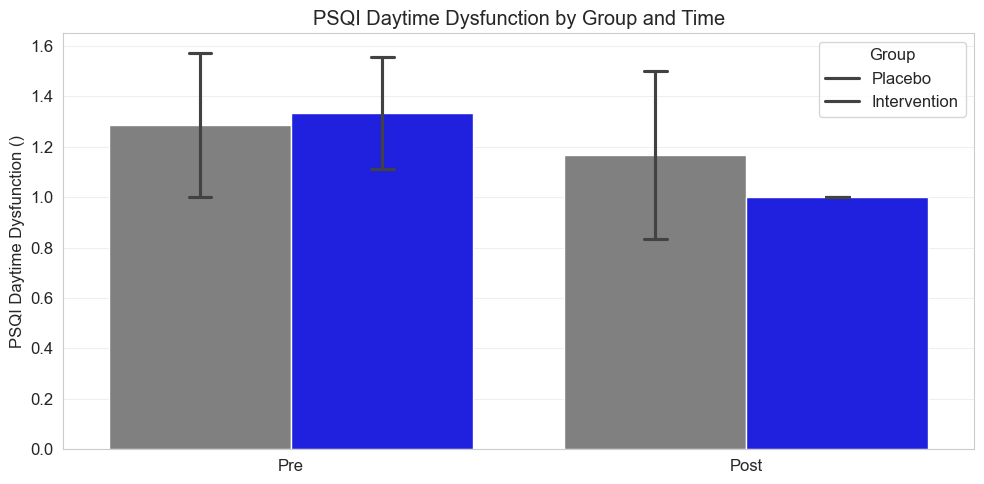

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


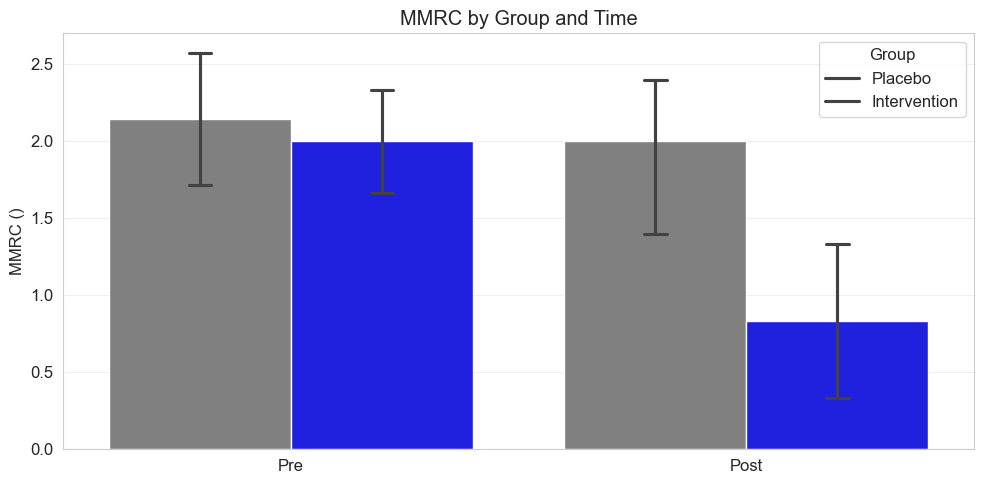

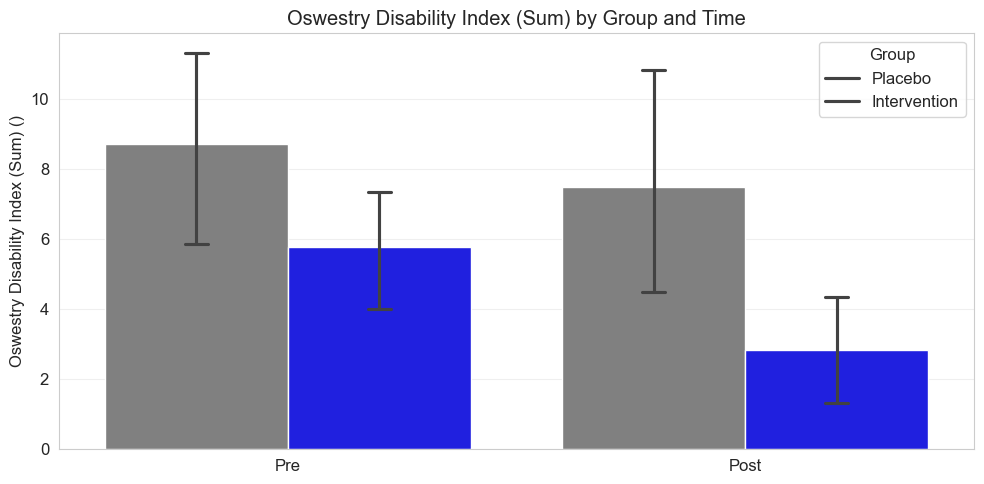

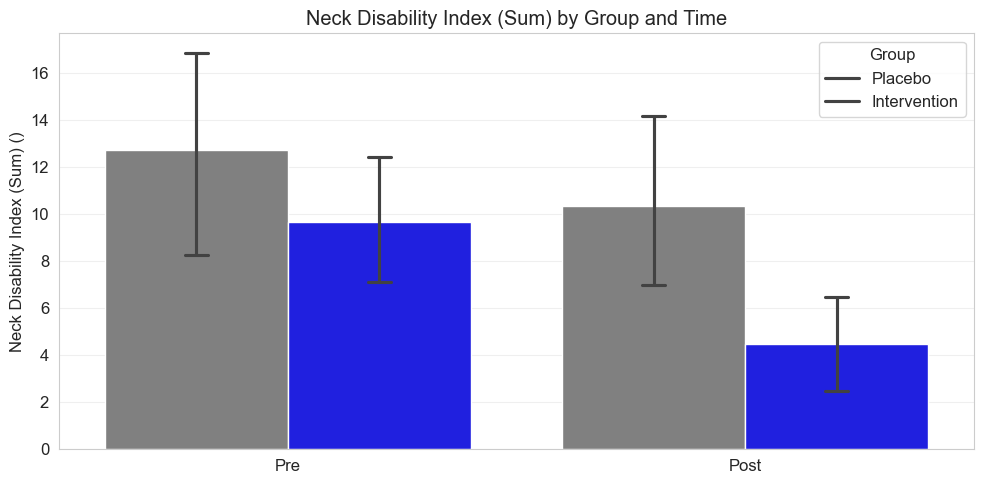

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


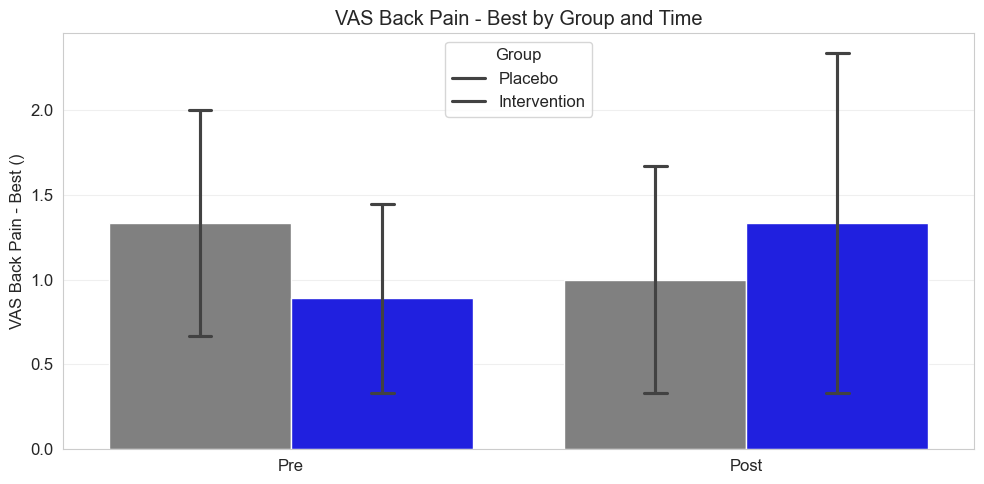

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


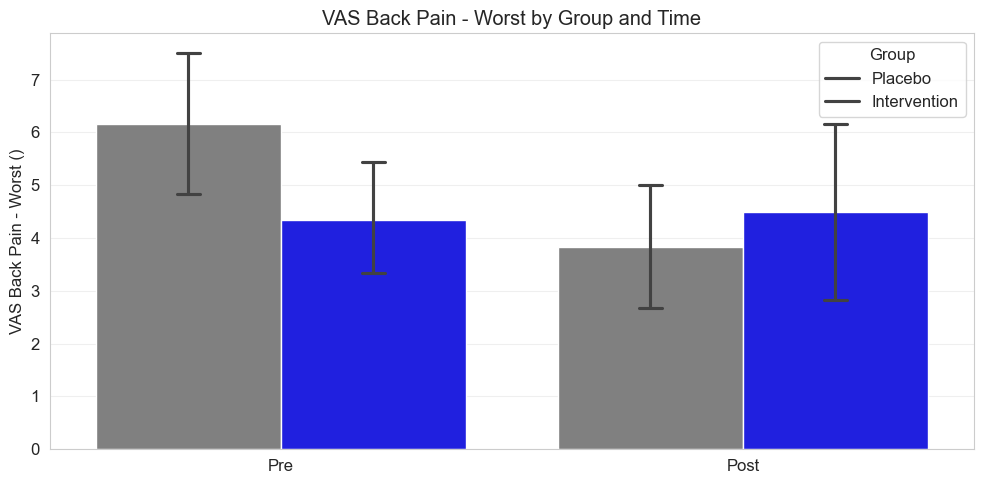

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


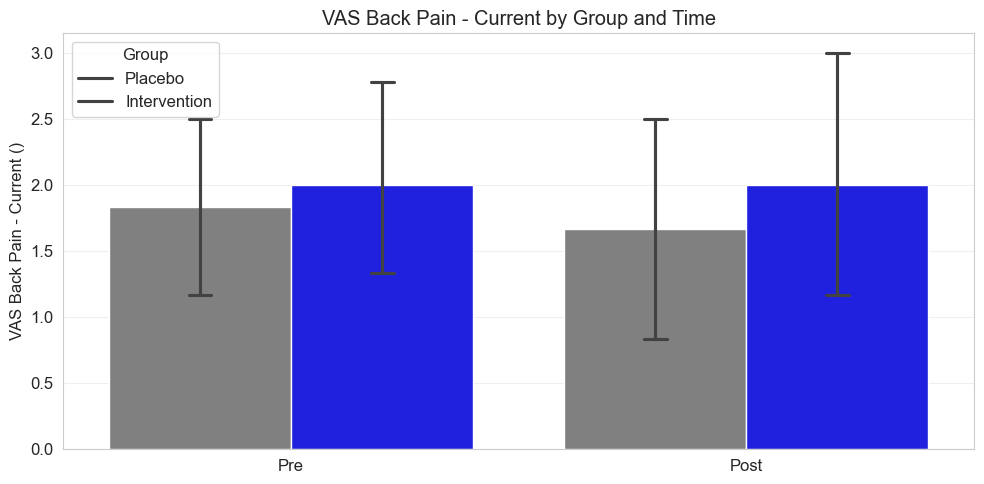

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


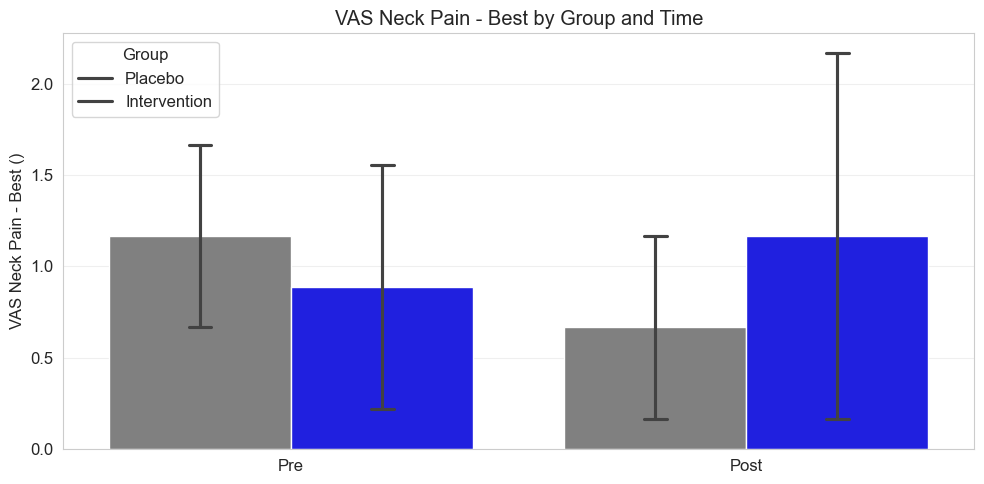

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


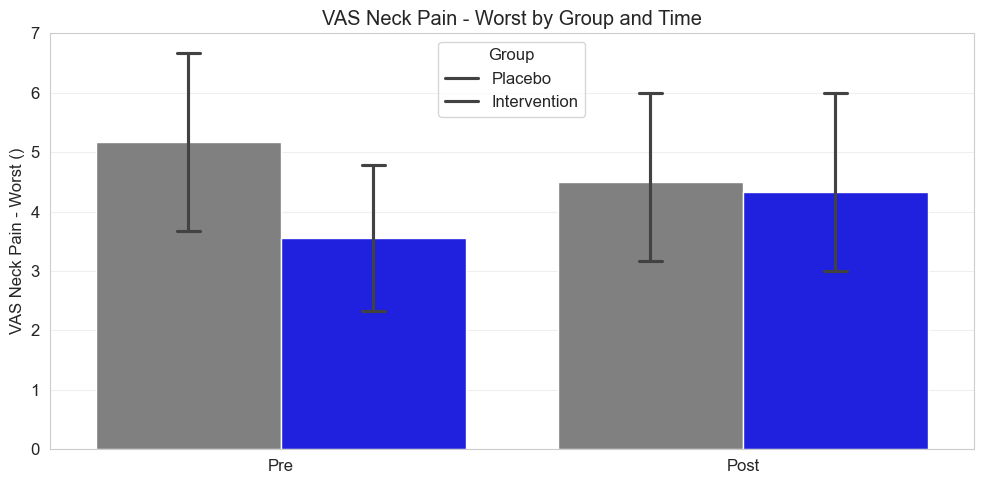

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


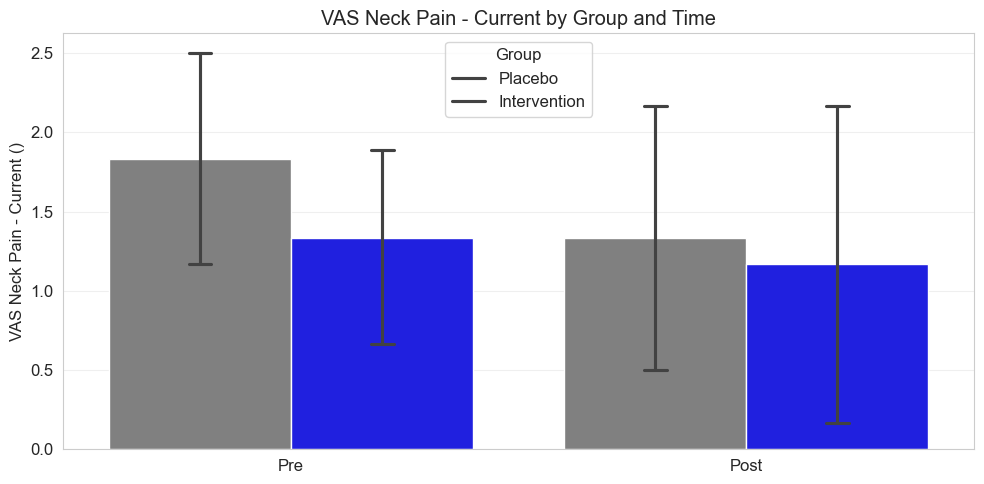

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


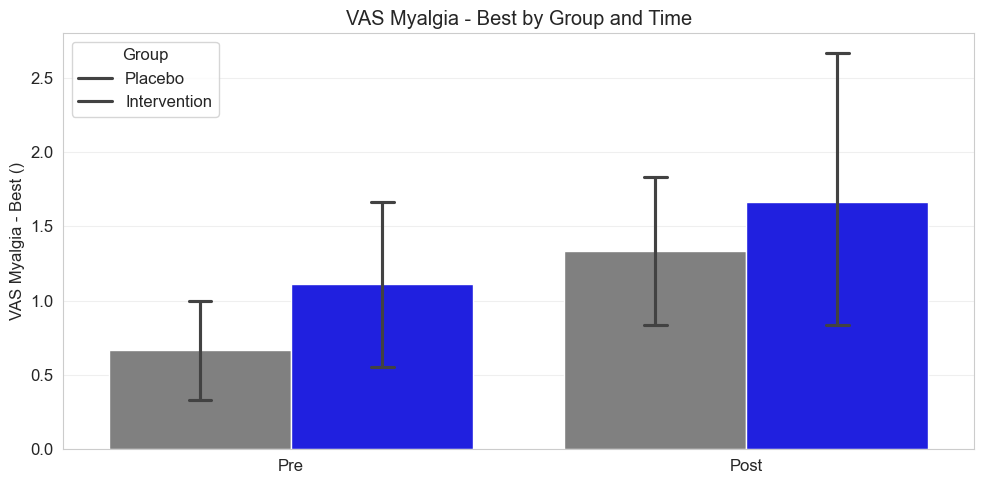

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


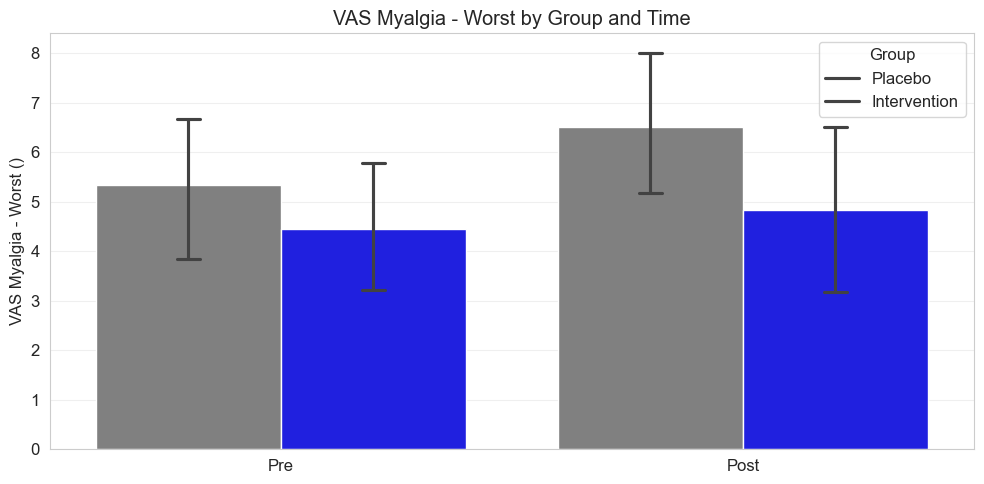

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


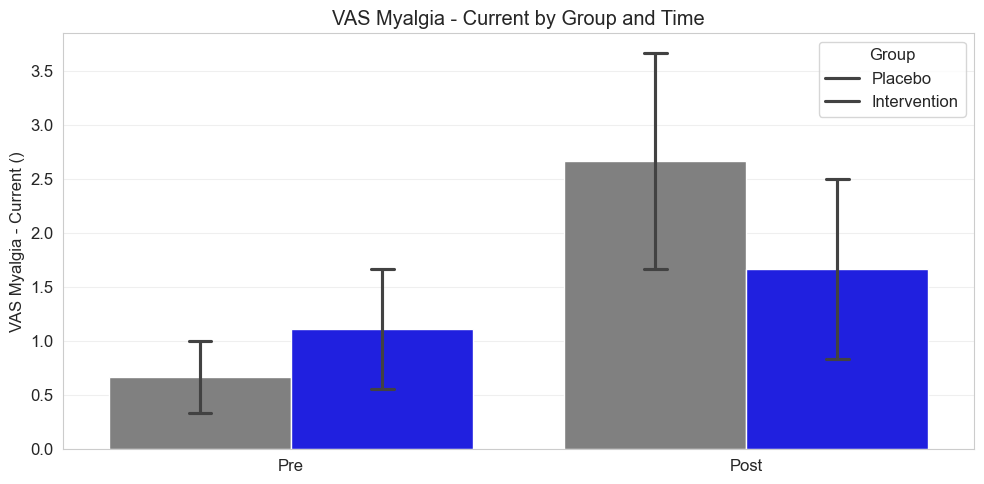

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


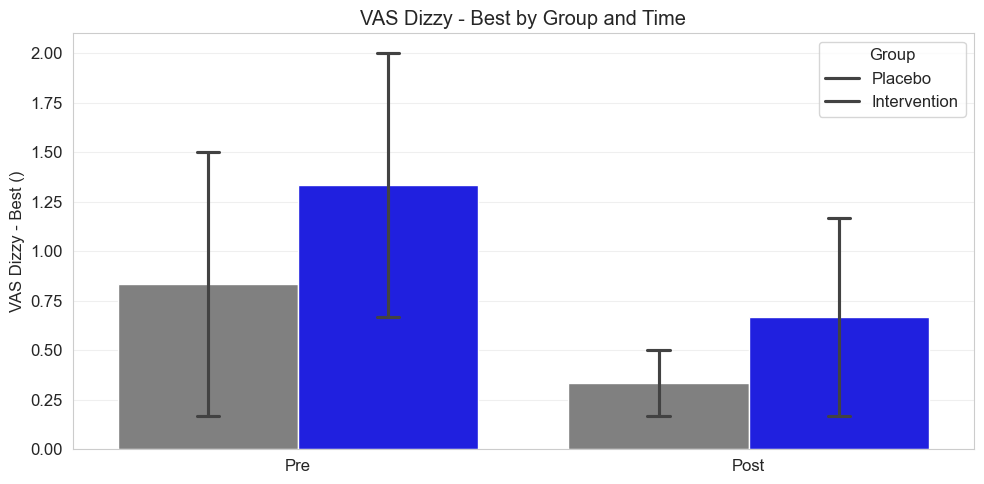

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


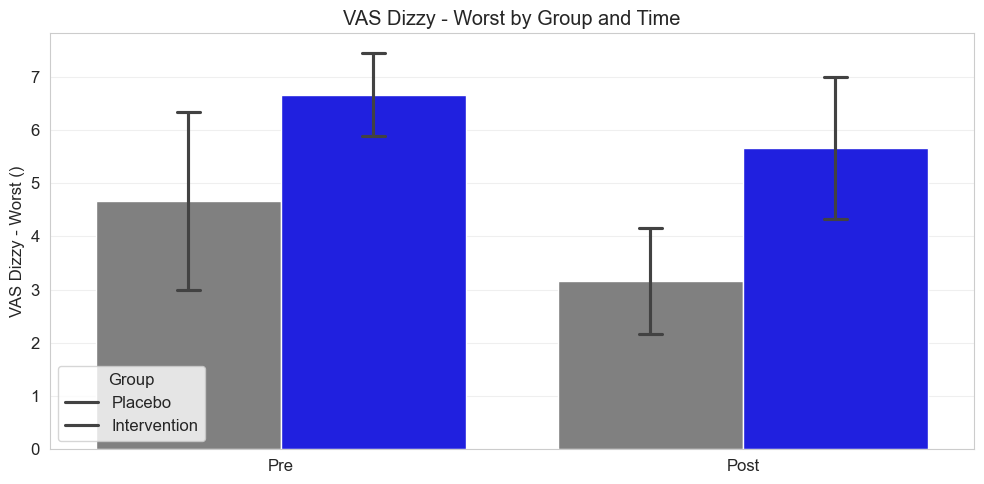

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


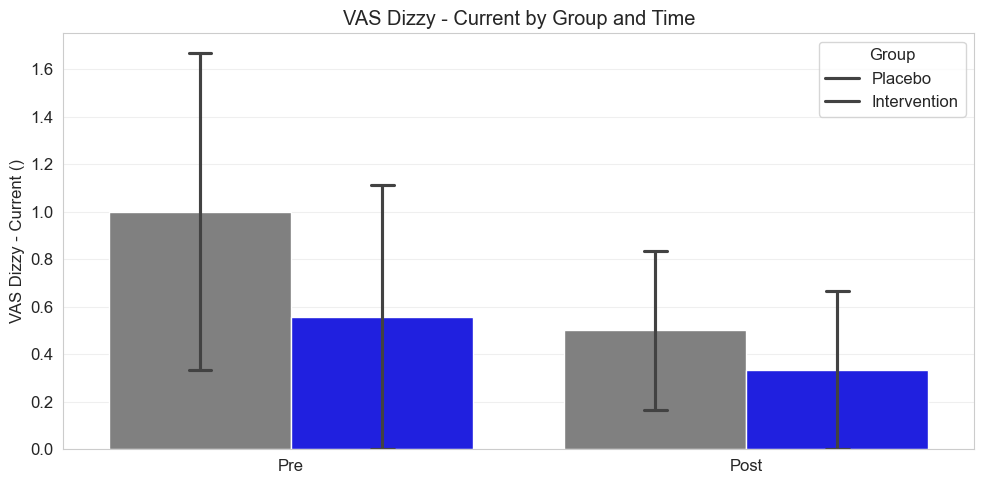

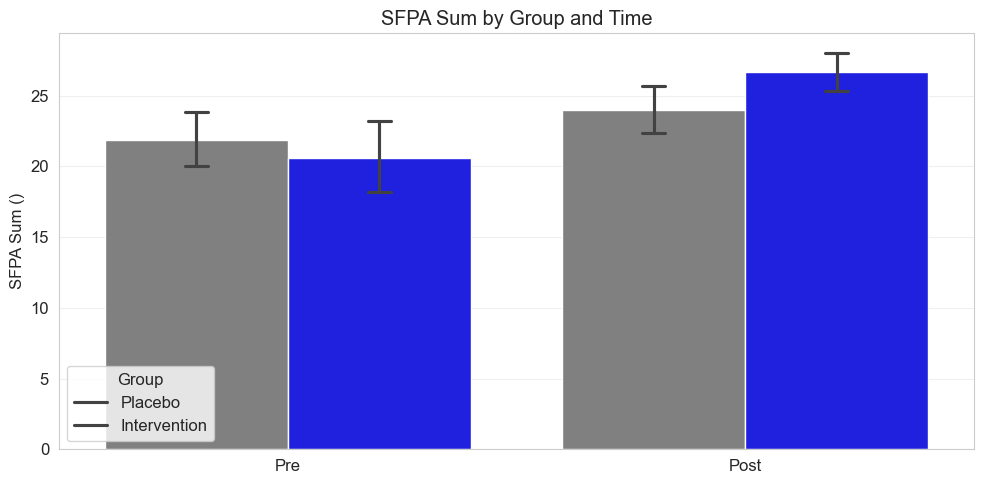

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


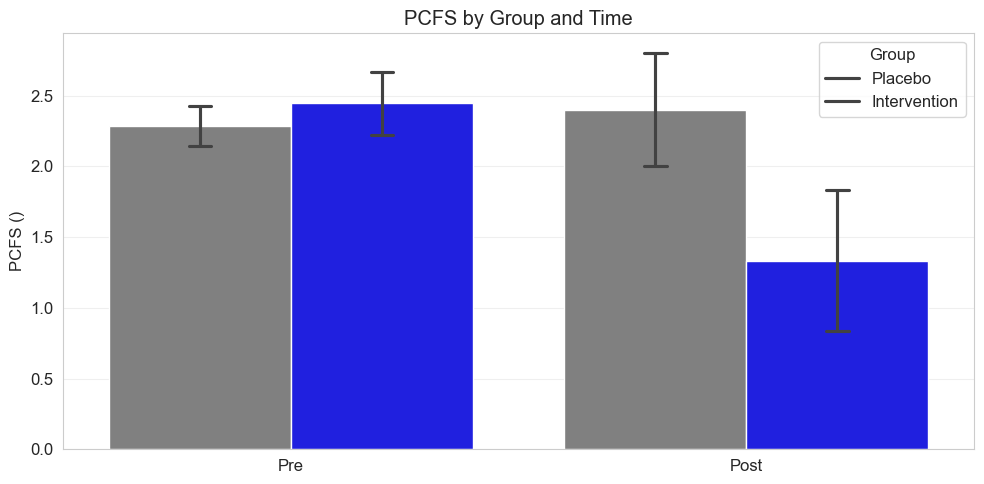

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


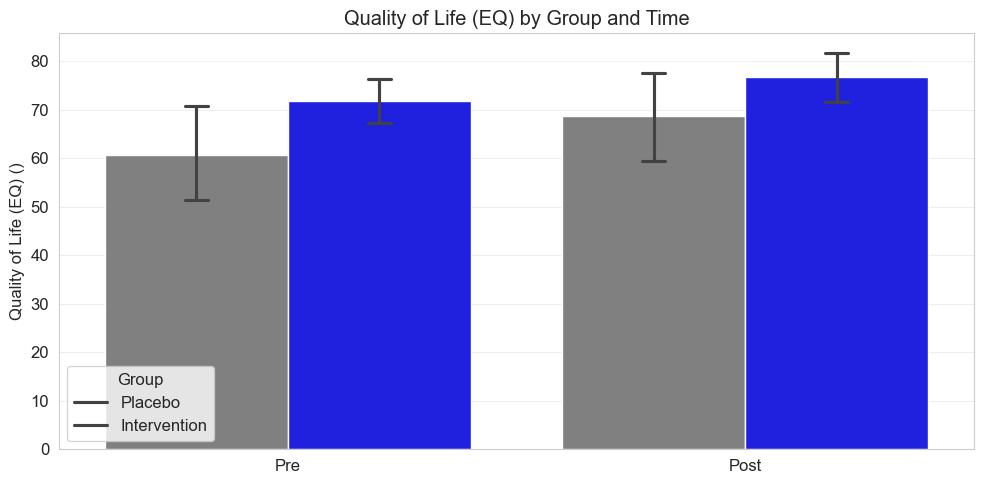

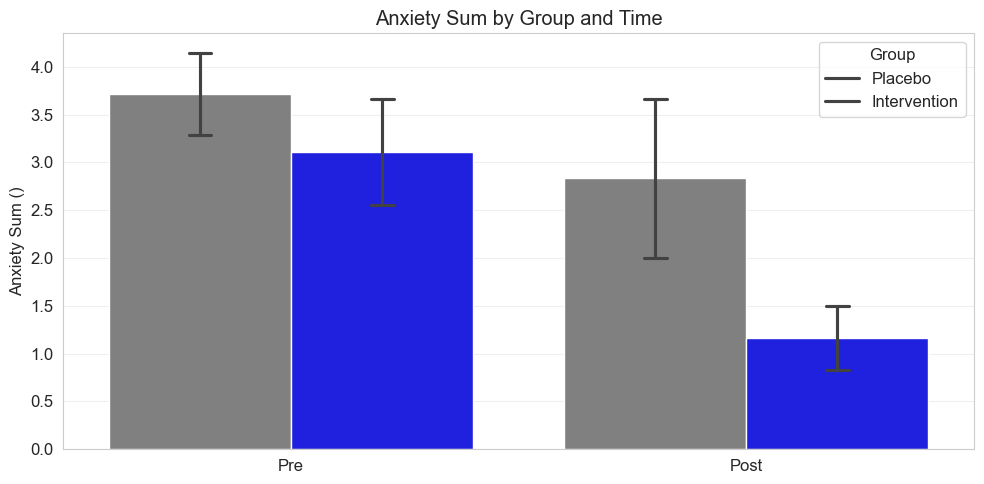

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: divide by zero encountered in scalar divide
  W = numer / denom


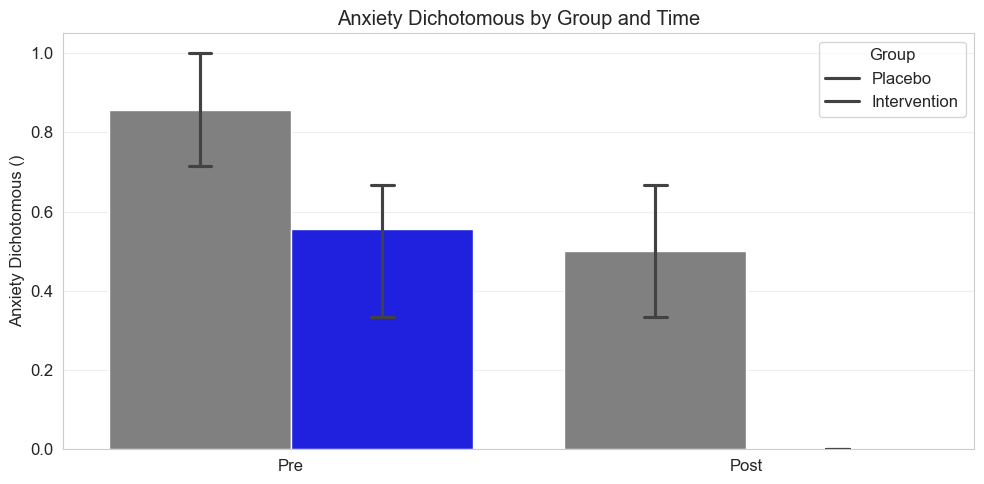

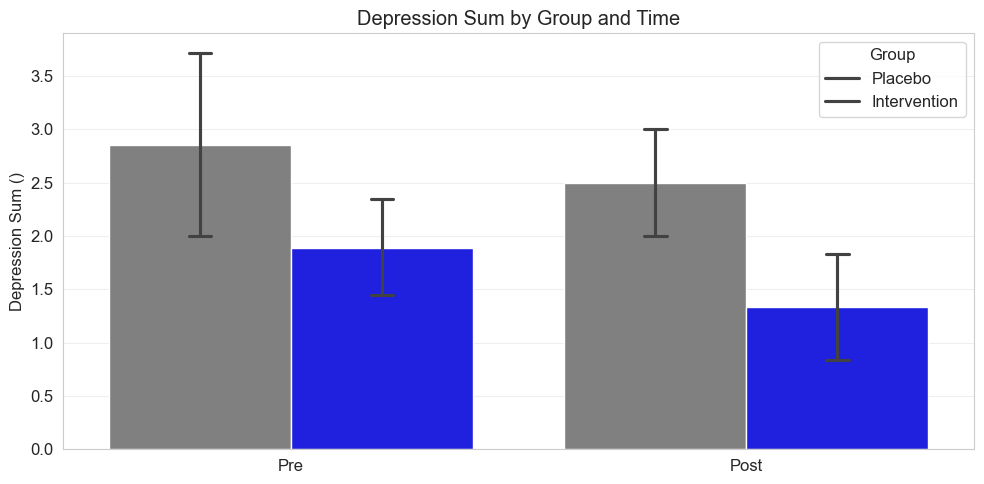

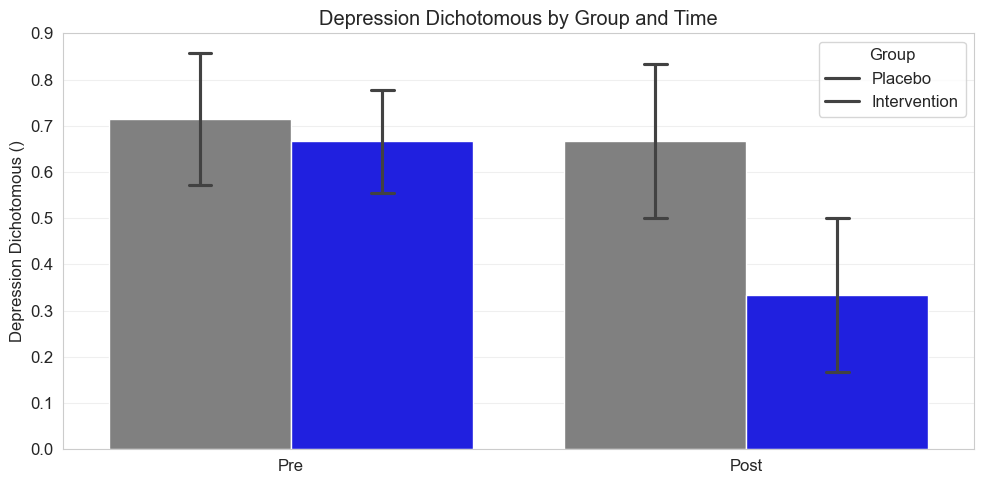

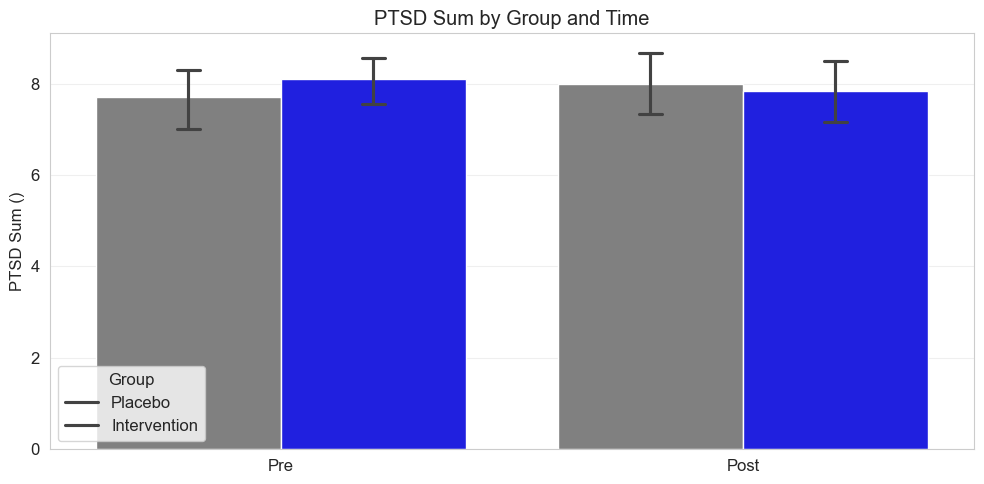

C:\Users\ZCooper\AppData\Roaming\Python\Python312\site-packages\pingouin\parametric.py:571: RuntimeWarning: invalid value encountered in scalar divide
  fval = ms_with / ms_reswith
C:\Users\ZCooper\AppData\Roaming\Python\Python312\site-packages\pingouin\parametric.py:581: RuntimeWarning: invalid value encountered in scalar divide
  ef = ss_with / (ss_with + ss_resall)
C:\Users\ZCooper\AppData\Roaming\Python\Python312\site-packages\pingouin\parametric.py:1008: RuntimeWarning: invalid value encountered in scalar divide
  fval = msbetween / mserror
C:\Users\ZCooper\AppData\Roaming\Python\Python312\site-packages\pingouin\parametric.py:1014: RuntimeWarning: invalid value encountered in scalar divide
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
C:\Users\ZCooper\AppData\Roaming\Python\Python312\site-packages\pingouin\parametric.py:1543: RuntimeWarning: invalid value encountered in scalar divide
  f_betw = ms_betw / ms_resbetw
C:\Users\ZCooper\AppData\Roaming\Python\Pytho

Error processing ptsd_dichotomous: 'p-unc'


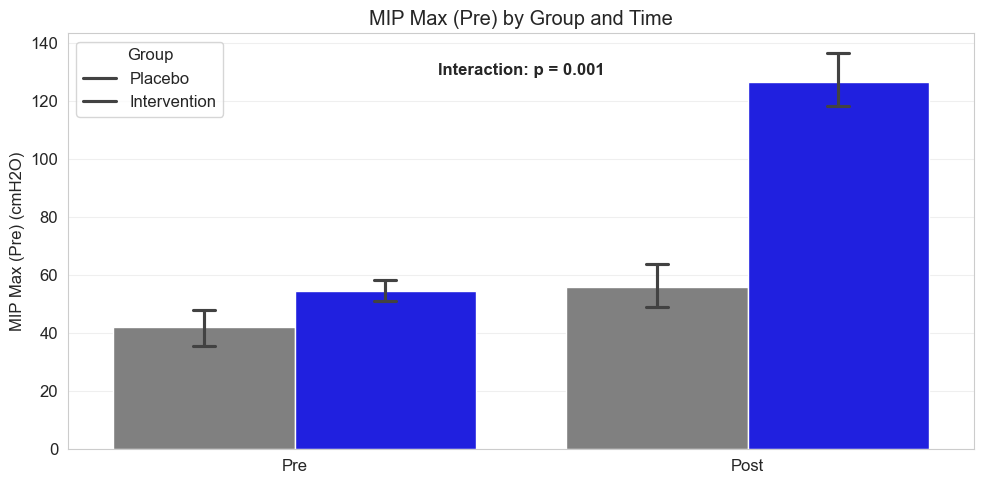

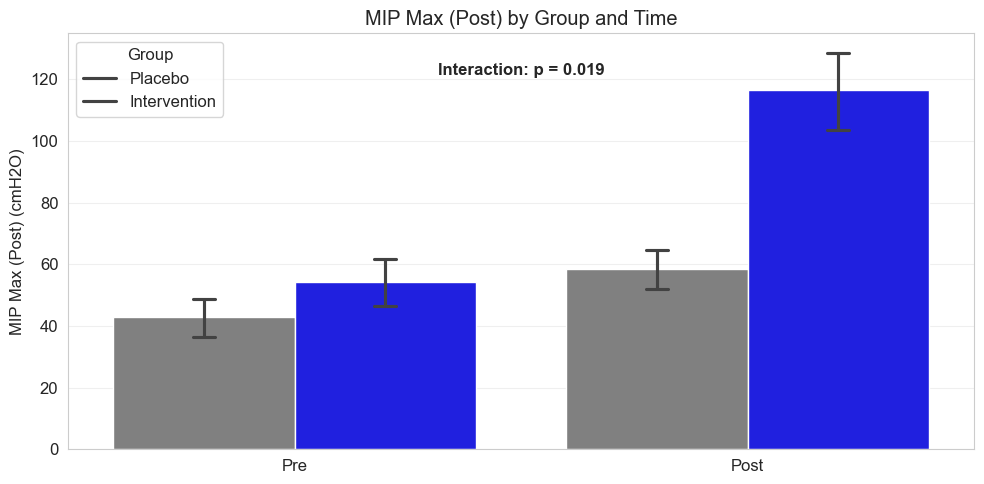

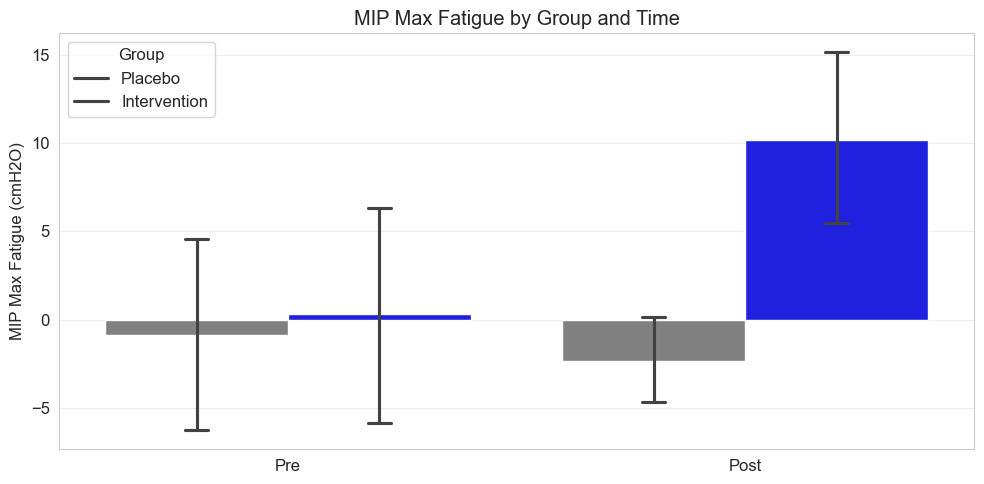

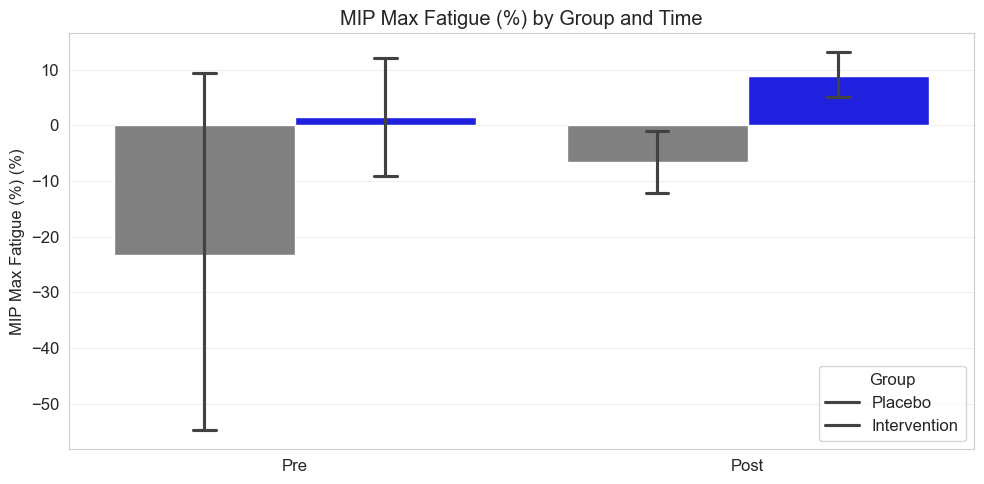

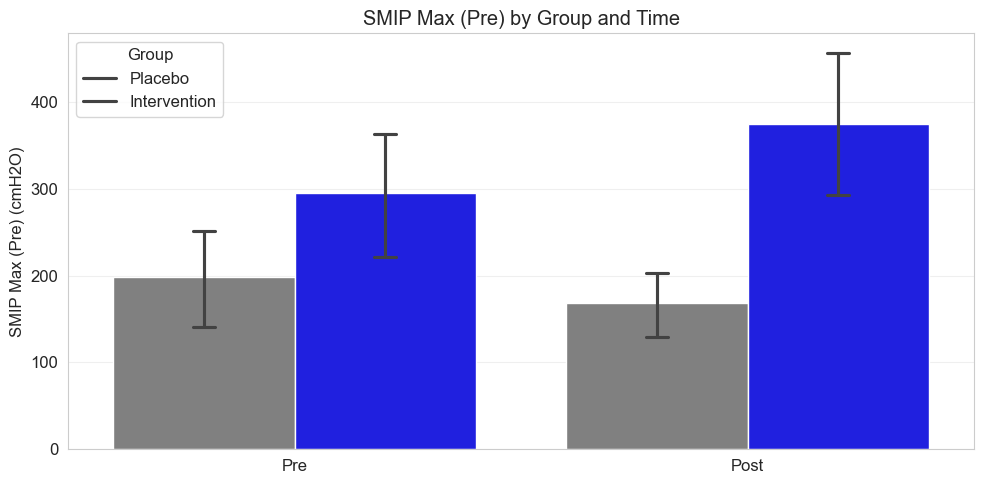

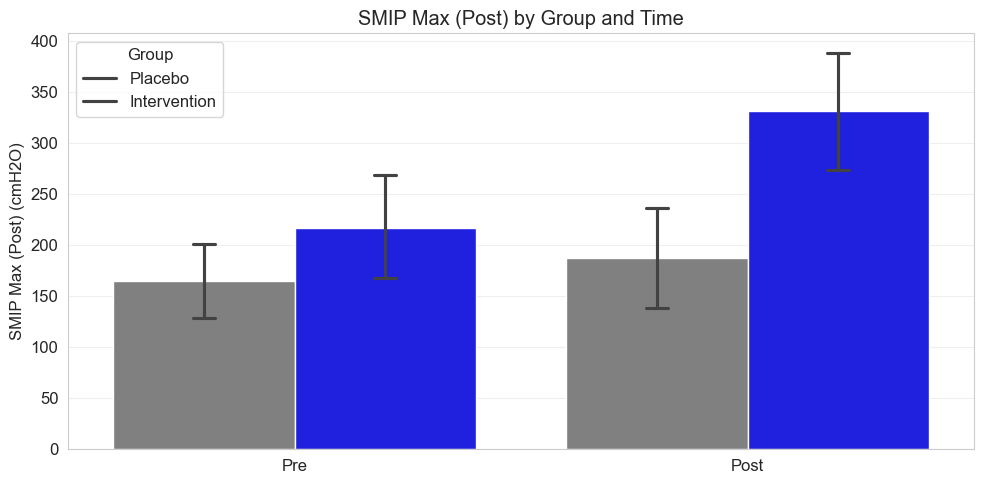

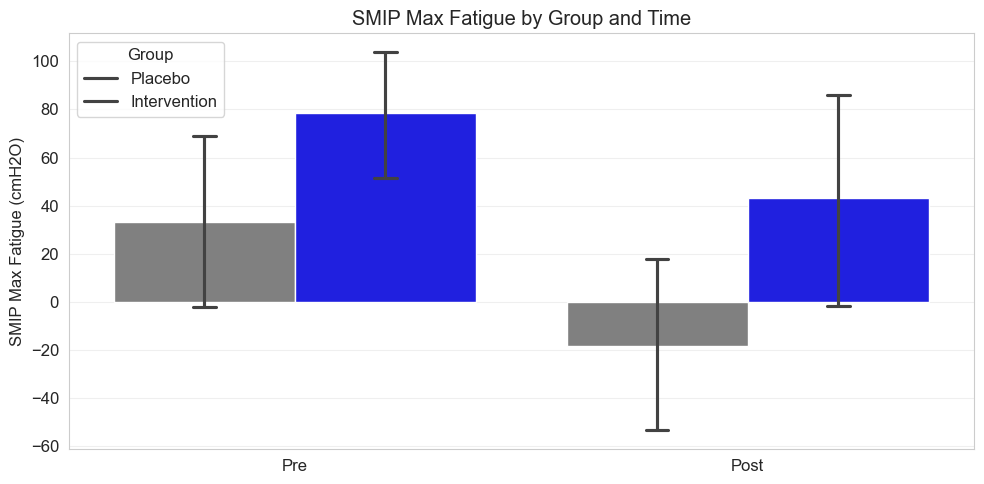

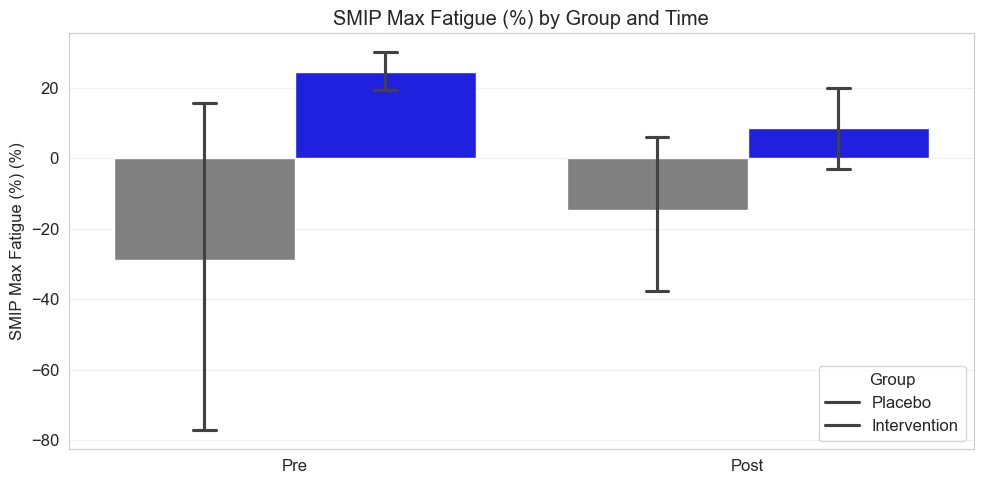

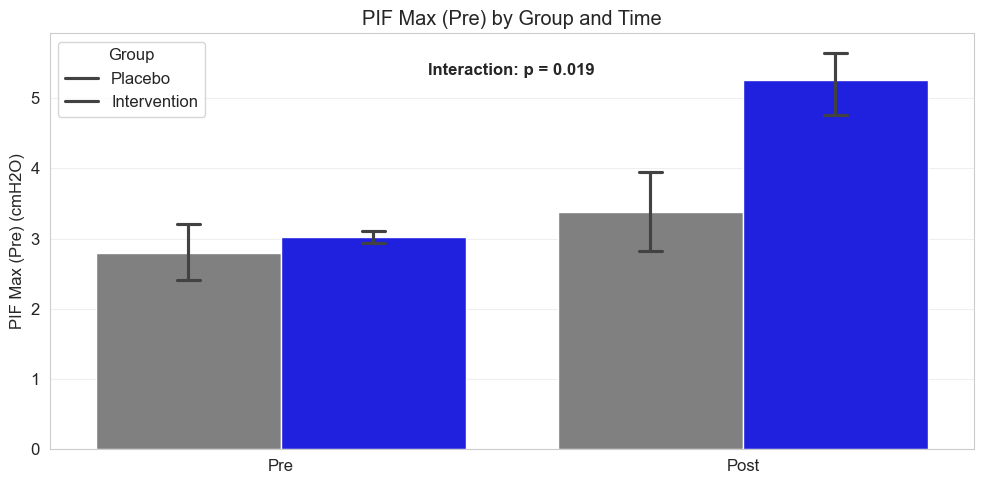

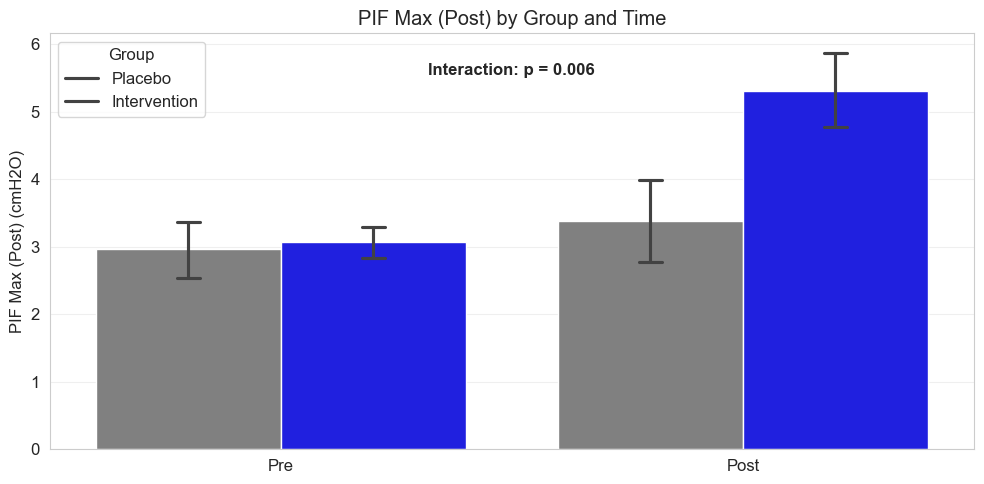

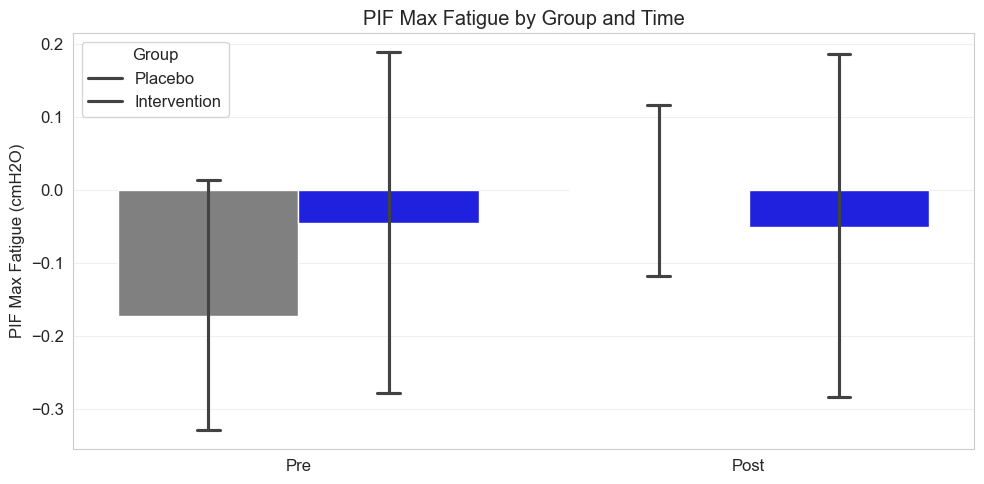

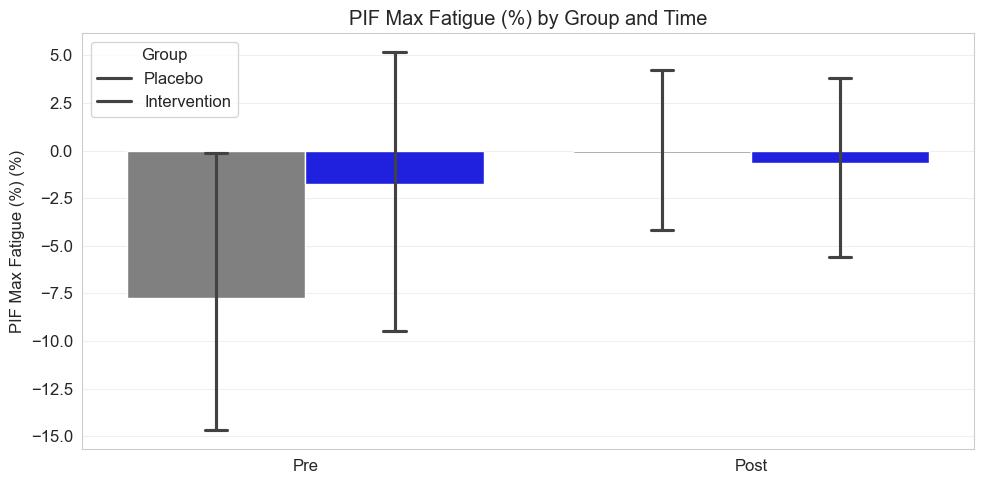

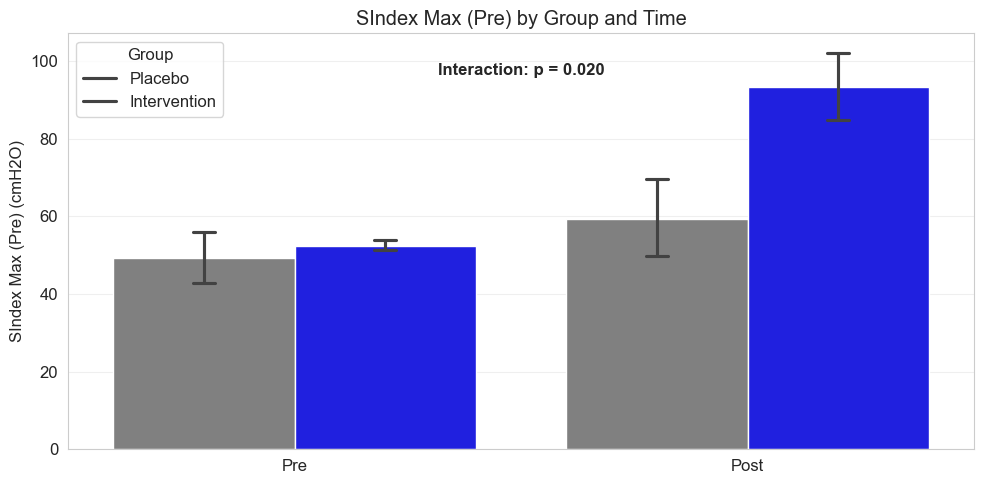

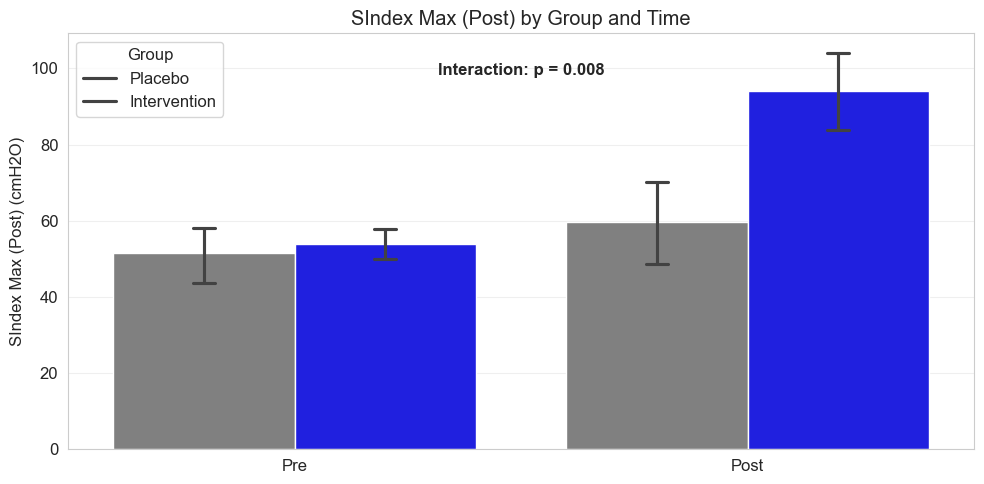

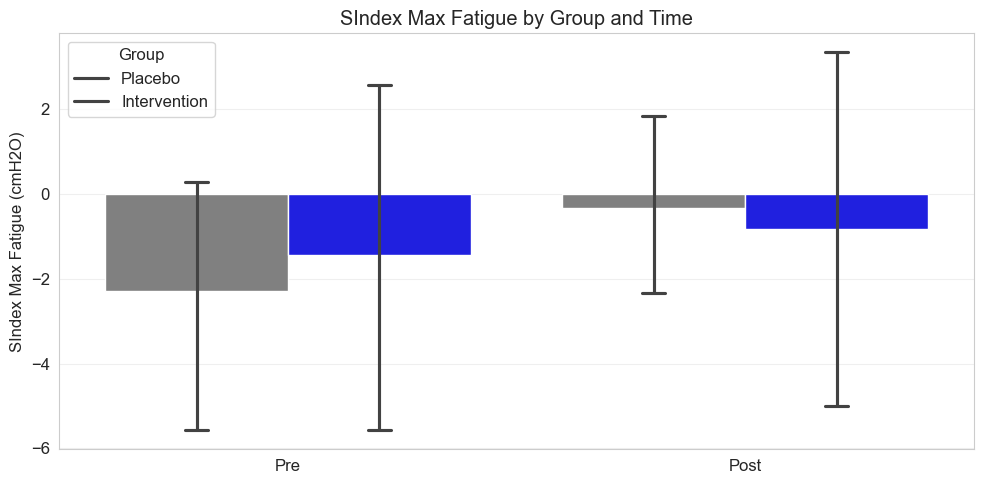

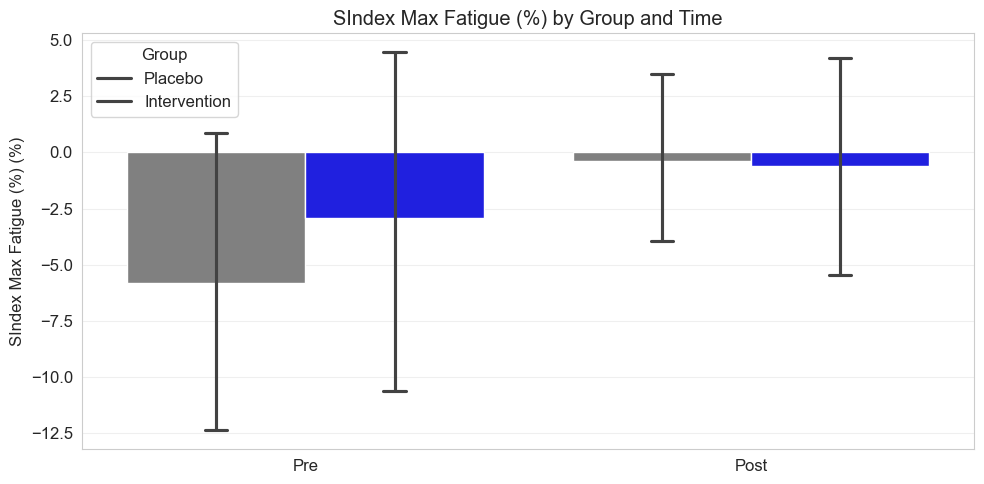

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


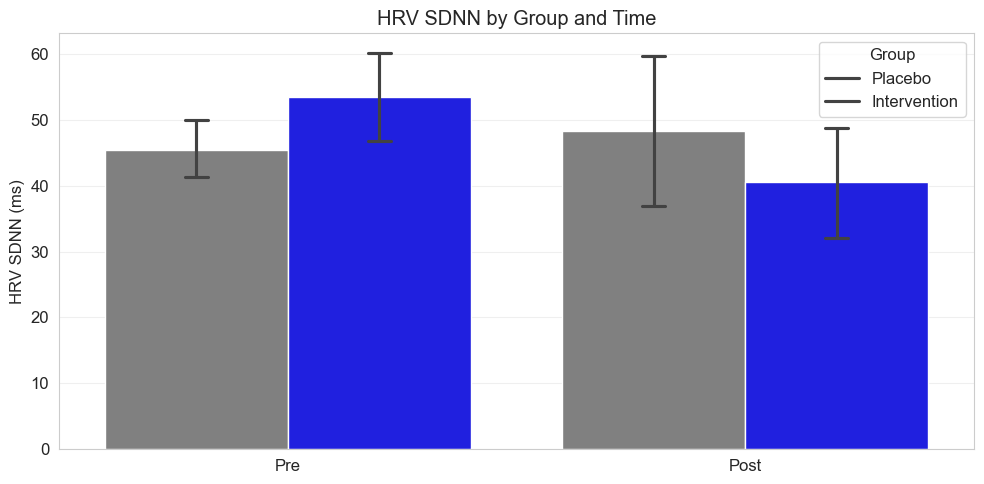

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


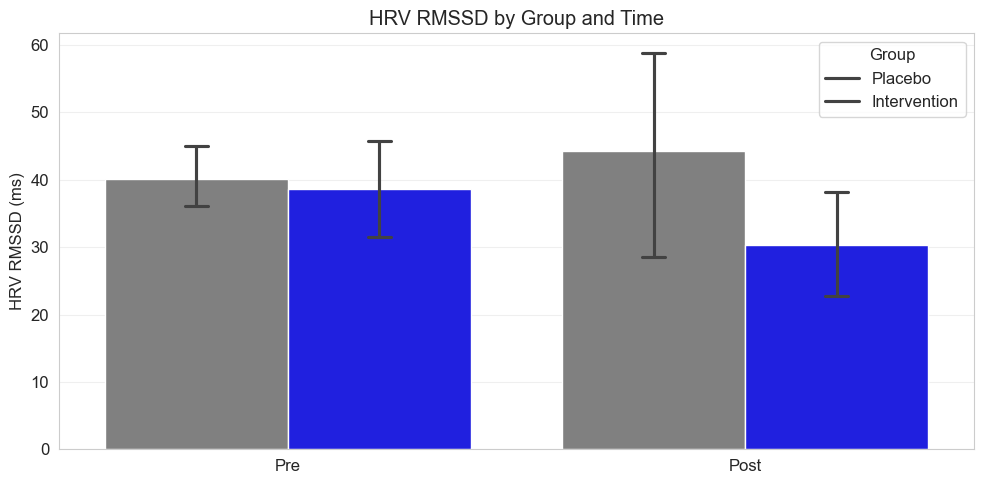

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


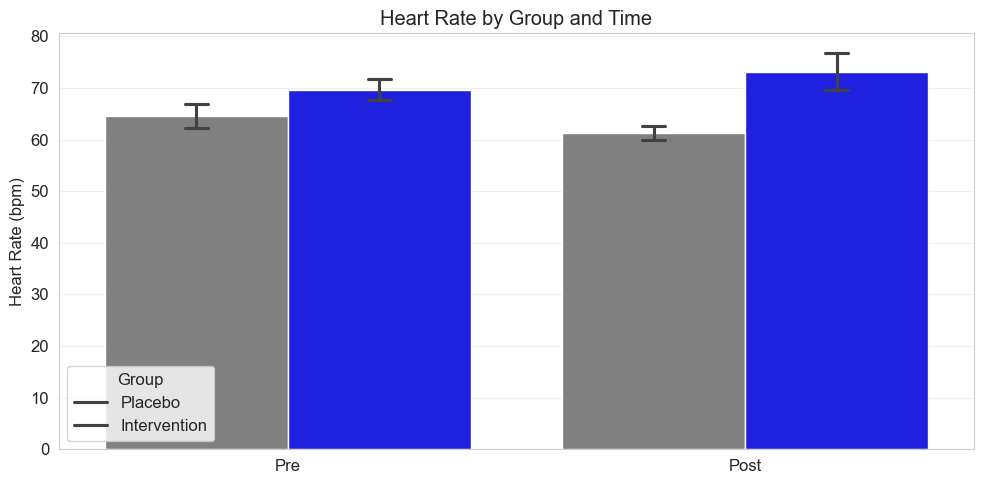

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


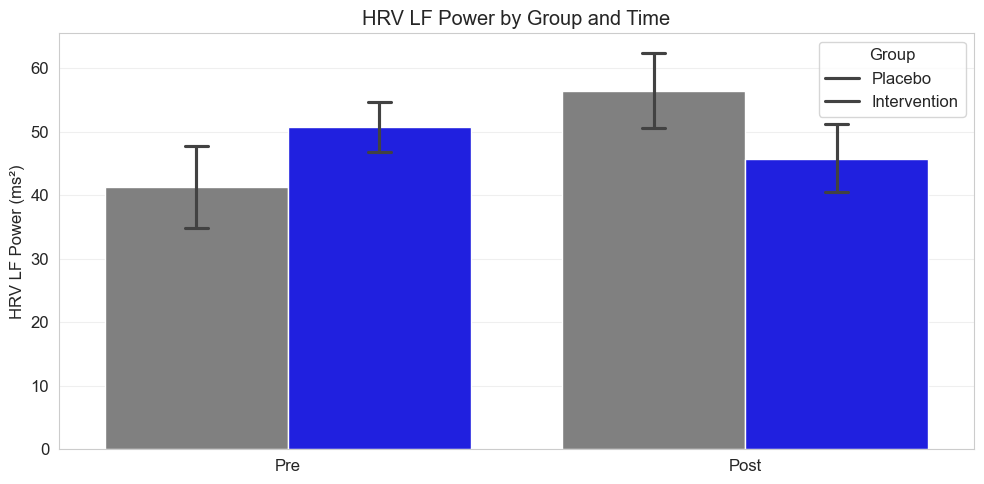

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


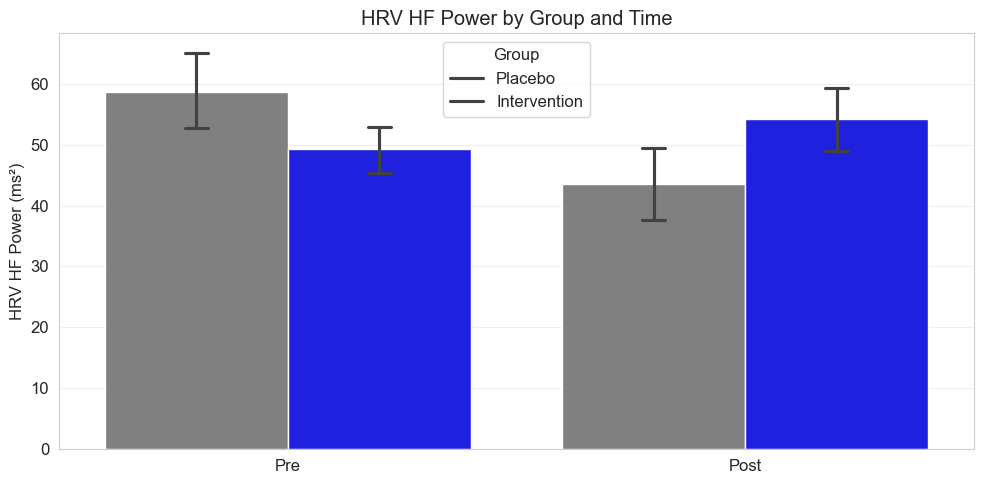

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


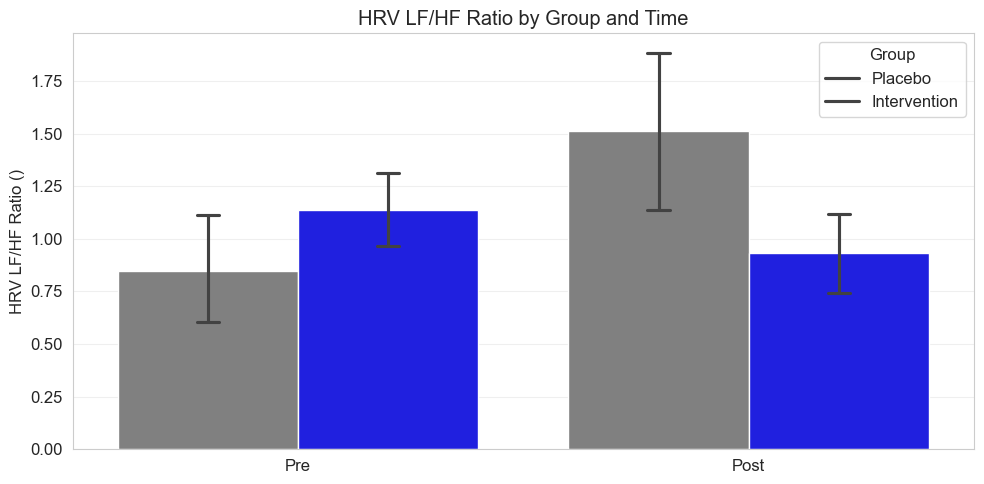

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


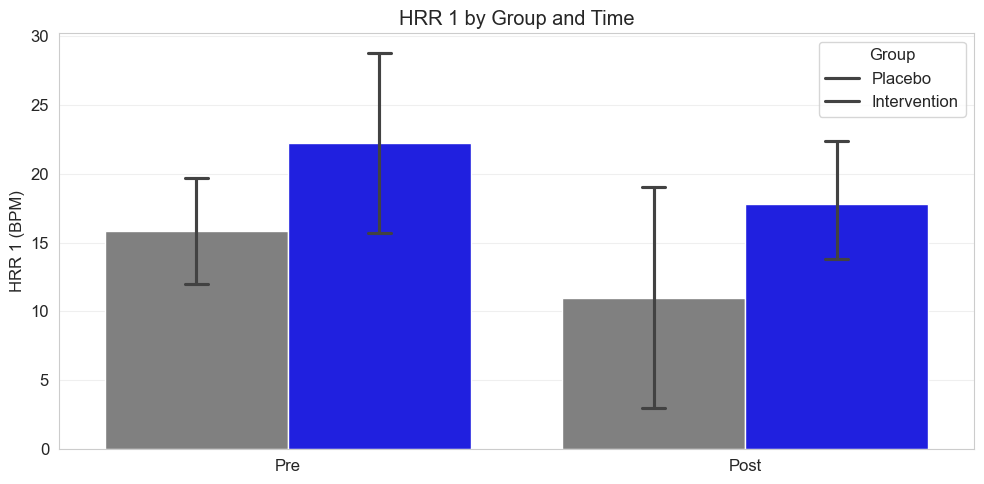

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


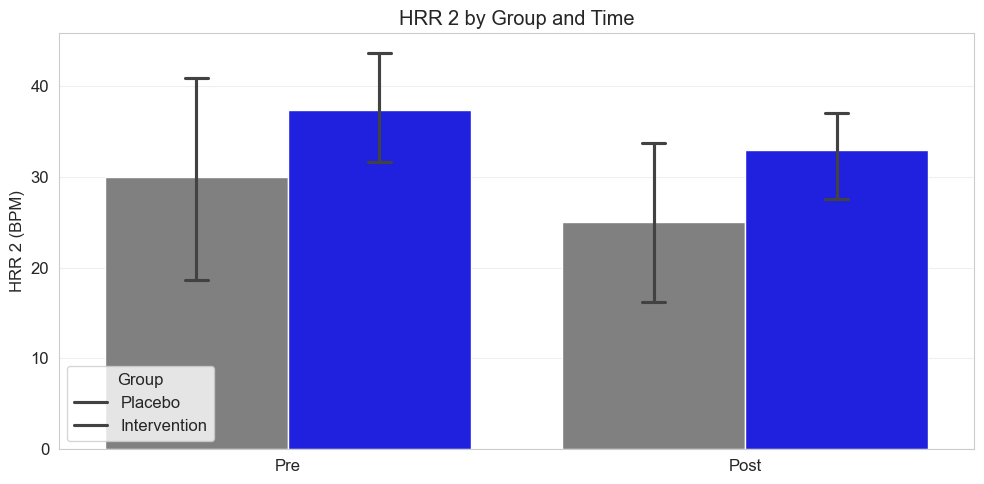

C:\Users\ZCooper\AppData\Local\Temp\ipykernel_7492\3816210624.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')


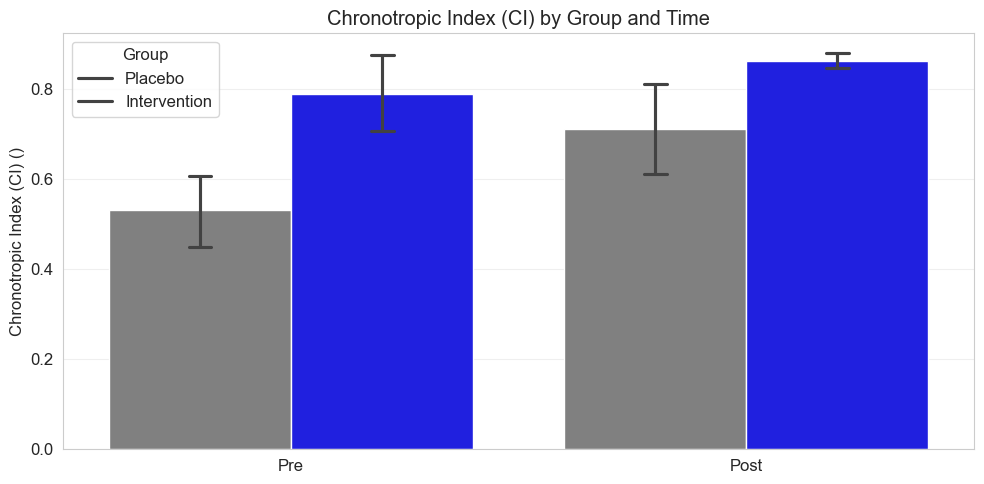

=== Mixed ANOVA Results ===


,Outcome,Group_p,Time_p,Interaction_p,Normality_p,Significant_Interaction
0,fmd_percent,0.160,0.011,0.624,0.172,False
1,cpet_vo2peak_relative,0.206,0.110,0.142,0.745,False
2,fss_sum,0.632,0.006,0.178,0.115,False
3,dsq_sum,0.697,0.112,0.026,0.107,True
4,woods_sum,0.486,0.018,0.121,0.367,False
...,...,...,...,...,...,...
59,hrv_hf,0.732,0.680,0.155,0.707,False
60,hrv_lfhf,0.573,0.650,0.201,0.102,False
61,cpet_hrr1,0.480,0.116,0.518,0.576,False
62,cpet_hrr2,0.707,0.154,0.986,0.624,False



=== Assumption Checks ===


,Outcome,Normality (p),Homogeneity Pre,Homogeneity Post
0,fmd_percent,0.172,0.051,0.951
1,cpet_vo2peak_relative,0.745,0.897,0.604
2,fss_sum,0.115,0.751,0.094
3,dsq_sum,0.107,0.962,0.159
4,woods_sum,0.367,0.731,0.244
...,...,...,...,...
59,hrv_hf,0.707,0.707,0.897
60,hrv_lfhf,0.102,0.945,0.282
61,cpet_hrr1,0.576,0.114,0.287
62,cpet_hrr2,0.624,0.457,0.061


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
from scipy.stats import levene, shapiro

# Configure plot settings
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'font.size': 12
})

# Custom color palette
custom_palette = {
    0: "gray",   # Placebo
    1: "blue"    # Intervention
}


# Initialize results storage
results = []
assumptions = []

# Loop through outcomes
for outcome, meta in outcome_measures.items():
    try:
        # Subset data (exclude missing)
        df_clean = df.dropna(subset=[outcome, 'interventiongroup', 'time_point', 'record_id'])
        
        # --- Mixed ANOVA ---
        anova = pg.mixed_anova(
            data=df_clean,
            dv=outcome,
            between='interventiongroup',
            within='time_point',
            subject='record_id'
        )
        
        # Extract p-values
        p_group = anova.loc[anova['Source'] == 'interventiongroup', 'p-unc'].values[0]
        p_time = anova.loc[anova['Source'] == 'time_point', 'p-unc'].values[0]
        p_interaction = anova.loc[anova['Source'] == 'Interaction', 'p-unc'].values[0]
        
        # --- Diagnostic Checks ---
        # 1. Calculate residuals manually (predicted vs actual)
        df_clean['predicted'] = df_clean.groupby(['time_point', 'interventiongroup'])[outcome].transform('mean')
        residuals = df_clean[outcome] - df_clean['predicted']
        _, p_normality = shapiro(residuals)
        
        # 2. Homogeneity of variance
        try:
            p_homogeneity_pre = levene(
                *[group[outcome].values for name, group in df_clean[df_clean['time_point'] == 1].groupby('interventiongroup')]
            ).pvalue
            p_homogeneity_post = levene(
                *[group[outcome].values for name, group in df_clean[df_clean['time_point'] == 2].groupby('interventiongroup')]
            ).pvalue
        except:
            p_homogeneity_pre = p_homogeneity_post = np.nan
        
        # Store assumptions
        assumptions.append({
            'Outcome': outcome,
            'Normality (p)': p_normality,
            'Homogeneity Pre': p_homogeneity_pre,
            'Homogeneity Post': p_homogeneity_post
        })
        
        # --- Plotting ---
        plt.figure(figsize=(10, 5))
        sns.barplot(
            data=df_clean,
            x='time_point',
            y=outcome,
            hue='interventiongroup',
            palette=custom_palette,
            errorbar=('ci', 68),
            capsize=0.1
        )
        
        if p_interaction < 0.05:
            plt.text(0.5, 0.9, f'Interaction: p = {p_interaction:.3f}', 
                    ha='center', transform=plt.gca().transAxes, fontweight='bold')
        
        plt.xticks([0, 1], ['Pre', 'Post'])
        plt.xlabel('')
        plt.ylabel(f"{meta['name']} ({meta['unit']})")
        plt.legend(title='Group', labels=['Placebo', 'Intervention'])
        plt.title(f"{meta['name']} by Group and Time")
        plt.tight_layout()
        plt.show()
        
        # Store results
        results.append({
            'Outcome': outcome,
            'Group_p': p_group,
            'Time_p': p_time,
            'Interaction_p': p_interaction,
            'Normality_p': p_normality
        })
        
    except Exception as e:
        print(f"Error processing {outcome}: {str(e)}")
        continue

# Create results DataFrame
if results:  # Only proceed if we have results
    results_df = pd.DataFrame(results)
    
    # Check if Interaction_p exists before using it
    if 'Interaction_p' in results_df.columns:
        results_df['Significant_Interaction'] = results_df['Interaction_p'] < 0.05
    else:
        print("Warning: Interaction_p column missing!")
    
    print("=== Mixed ANOVA Results ===")
    display(results_df.round(3))
    
    print("\n=== Assumption Checks ===")
    display(pd.DataFrame(assumptions).round(3))
else:
    print("No results were generated - check your input data")

# Linear Mixed Model

In [13]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Outcome measures
outcome_measures = {
    'fmd_percent': {'name': 'Flow-Mediated Dilation', 'unit': '%'},
    'cpet_vo2peak_relative': {'name': 'VO2 Peak', 'unit': 'mL/kg/min'},
    'psqi_sum': {'name': 'PSQI Score', 'unit': ''},
    'fss_sum': {'name': 'Fatigue Severity', 'unit': ''},
    'woods_sum': {'name': 'Mental Fatigue', 'unit': ''}
}

# Results storage
results = []

# Loop through outcome measures
for outcome, meta in outcome_measures.items():
    try:
        # Subset data (exclude missing)
        df_clean = df.dropna(subset=[outcome, 'interventiongroup', 'time_point', 'record_id'])

        # Make sure 'time_point' and 'interventiongroup' are coded as categorical (important!)
        df_clean['time_point'] = df_clean['time_point'].astype('category')
        df_clean['interventiongroup'] = df_clean['interventiongroup'].astype('category')
        
        # Linear Mixed Model
        formula = f"{outcome} ~ time_point * interventiongroup"
        model = smf.mixedlm(formula, df_clean, groups=df_clean["record_id"])
        result = model.fit(reml=False)  # Use ML instead of REML for testing fixed effects
        
        # Extract p-values
        pvals = result.pvalues
        p_time = pvals.get('time_point[T.2]', np.nan)  # Adjust depending on your coding!
        p_group = pvals.get('interventiongroup[T.1]', np.nan)
        interaction_term = 'time_point[T.2]:interventiongroup[T.1]'
        p_interaction = pvals.get(interaction_term, np.nan)
        
        results.append({
            'Outcome': outcome,
            'Group_p': p_group,
            'Time_p': p_time,
            'Interaction_p': p_interaction,
            'AIC': result.aic
        })

        # Print summary
        print(f"\n=== {meta['name']} ===")
        print(result.summary())
    
    except Exception as e:
        print(f"Error processing {outcome}: {str(e)}")

# Create results DataFrame
results_df = pd.DataFrame(results)
if 'Interaction_p' in results_df.columns:
    results_df['Significant_Interaction'] = results_df['Interaction_p'] < 0.05
else:
    print("Warning: Interaction_p column missing!")

print("\n=== Linear Mixed Model Results ===")
print(results_df.round(4))


C:\Users\ZCooper\AppData\Local\Temp\ipykernel_1860\707198758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_point'] = df_clean['time_point'].astype('category')
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_1860\707198758.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['interventiongroup'] = df_clean['interventiongroup'].astype('category')
C:\Users\ZCooper\AppData\Local\Temp\ipykernel_1860\707198758.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 


=== Flow-Mediated Dilation ===
                      Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         fmd_percent
No. Observations:         19              Method:                     ML         
No. Groups:               12              Scale:                      0.7380     
Min. group size:          1               Log-Likelihood:             -29.8663   
Max. group size:          2               Converged:                  Yes        
Mean group size:          1.6                                                    
---------------------------------------------------------------------------------
                                         Coef. Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                                4.438    0.503 8.815 0.000  3.451  5.425
time_point[T.2]                          1.530    0.583 2.625 0.009  0.387  2.673
interv

In [ ]:
import statsmodels.formula.api as smf

# Correct formula syntax for statsmodels (random effects handled by 'groups' argument)
formula = 'fmd_percent ~ interventiongroup + mip_post_max_change'

# Drop rows with missing values in relevant columns
model_data = df.dropna(subset=['fmd_percent', 'interventiongroup',  'record_id'])

# Fit the model
model = smf.mixedlm(formula, model_data, groups=model_data["record_id"])
result = model.fit(reml=False)  # Use ML instead of REML for testing fixed effects

# Print the summary of the model
print(result.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  fmd_percent
No. Observations:    27       Method:              ML         
No. Groups:          15       Scale:               2.4588     
Min. group size:     1        Log-Likelihood:      -50.8427   
Max. group size:     2        Converged:           Yes        
Mean group size:     1.8                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            5.187    0.470 11.042 0.000  4.267  6.108
interventiongroup    0.639    0.643  0.992 0.321 -0.622  1.900
mip_post_max_change -0.029    0.022 -1.339 0.181 -0.072  0.013
Group Var            0.072    0.459                           



# T-Tests

In [10]:
import pandas as pd
from scipy.stats import ttest_rel

table_results = []

for outcome, meta in outcome_measures.items():
    for group_name, group_label in [('Placebo', 0), ('Intervention', 1)]:
        group_data = df[df['interventiongroup'] == group_label]
        group_data = group_data.dropna(subset=[outcome, 'time_point', 'record_id'])

        pre = group_data[group_data['time_point'] == 1][['record_id', outcome]].rename(columns={outcome: 'pre_value'})
        post = group_data[group_data['time_point'] == 2][['record_id', outcome]].rename(columns={outcome: 'post_value'})
        merged = pd.merge(pre, post, on='record_id')

        if len(merged) >= 2:
            N = len(merged)
            pre_mean = merged['pre_value'].mean()
            post_mean = merged['post_value'].mean()
            mean_change = (merged['post_value'] - merged['pre_value']).mean()
            t_stat, p_value = ttest_rel(merged['pre_value'], merged['post_value'])
        else:
            N = len(merged)
            pre_mean = post_mean = mean_change = p_value = float('nan')

        table_results.append({
            'Outcome': meta['name'],
            'Group': group_name,
            'N': N,
            'Mean Pre': pre_mean,
            'Mean Post': post_mean,
            'Mean Change': mean_change,
            'Paired t-test p': p_value
        })

results_table = pd.DataFrame(table_results)
results_table


,Outcome,Group,N,Mean Pre,Mean Post,Mean Change,Paired t-test p
0,Flow-Mediated Dilation,Placebo,6,4.438333,5.771667,1.333333,0.074147
1,Flow-Mediated Dilation,Intervention,6,5.333333,7.188333,1.855000,0.079367
2,VO2 Peak,Placebo,6,20.050000,20.316667,0.266667,0.836517
3,VO2 Peak,Intervention,5,25.408000,28.480000,3.072000,0.064702
4,Fatigue Severity,Placebo,6,48.333333,41.333333,-7.000000,0.178299
...,...,...,...,...,...,...,...
125,HRR 1,Intervention,4,28.500000,14.250000,-14.250000,0.220387
126,HRR 2,Placebo,4,36.000000,25.000000,-11.000000,0.354741
127,HRR 2,Intervention,4,41.250000,30.500000,-10.750000,0.305512
128,Chronotropic Index (CI),Placebo,3,0.491069,0.712029,0.220960,0.075020


In [11]:
# Export results to CSV
results_table.to_csv('paired_t_test_results.csv', index=False)

In [37]:
import json

# Convert DataFrame to dictionary (orient='records' for list of dicts)
results_dict = results_table.to_dict(orient='records')

# Pretty-print the dictionary
print(json.dumps(results_dict, indent=4))


[
    {
        "Outcome": "Flow-Mediated Dilation",
        "Group": "Placebo",
        "N": 4,
        "Mean Pre": 4.325,
        "Mean Post": 5.91,
        "Mean Change": 1.585,
        "Paired t-test p": 0.175255893964492
    },
    {
        "Outcome": "Flow-Mediated Dilation",
        "Group": "Intervention",
        "N": 3,
        "Mean Pre": 5.513333333333333,
        "Mean Post": 7.536666666666666,
        "Mean Change": 2.023333333333333,
        "Paired t-test p": 0.07741063917123635
    },
    {
        "Outcome": "VO2 Peak",
        "Group": "Placebo",
        "N": 5,
        "Mean Pre": 18.580000000000002,
        "Mean Post": 19.5,
        "Mean Change": 0.9200000000000006,
        "Paired t-test p": 0.5094732760100432
    },
    {
        "Outcome": "VO2 Peak",
        "Group": "Intervention",
        "N": 4,
        "Mean Pre": 25.725,
        "Mean Post": 29.400000000000002,
        "Mean Change": 3.675,
        "Paired t-test p": 0.07377093096818896
    },
    {
   

In [13]:
print(df.columns.tolist())

['record_id', 'covid_group', 'interventiongroup', 'mmrc_score', 'pcfs_score', 'subject_dob', 'subject_gender', 'subject_ethnicity', 'health_ldl', 'health_hdl', 'health_triglyceride', 'health_smoking', 'health_history', 'health_medications', 'covid_onset', 'covid_infections', 'covid_vaccinations', 'covid_supplemento2', 'covid_hospitalization', 'covid_icu', 'covid_mechanicalvent', 'covid_intubation', 'covid_apnea', 'covid_apnea_ahi', 'covid_apnea_cpap', 'covid_hallucinations', 'covid_taste', 'covid_smell', 'covid_hearing', 'covid_tinnitus', 'covid_vision', 'covid_throat', 'covid_choking', 'covid_sweating', 'covid_sneezing', 'covid_coughing', 'covid_voice', 'covid_fevers', 'covid_hair', 'covid_skin', 'covid_digestion', 'covid_chestpain', 'covid_palpitations', 'covid_restlessleg', 'covid_other', 'covid_primary', 'data_age', 'cpet_hr_restingsit', 'cpet_sbp_sitting', 'cpet_dbp_sitting', 'cpet_hr_restingstand', 'cpet_sbp_standing', 'cpet_dbp_standing', 'cpet_spo2_pre', 'data_kilograms', 'data

# Measures of Interest

In [9]:
# Create a new DataFrame to store the results
results_df = pd.DataFrame()

# Get unique record_ids
record_ids = df['record_id'].unique()

# Add record_id column
results_df['record_id'] = record_ids

# Process each outcome measure
for outcome, meta in outcome_measures.items():
    # Skip if this outcome column doesn't exist in the dataframe
    if outcome not in df.columns:
        continue
    
    # Create temporary DataFrame to hold pre and post values
    temp_df = pd.DataFrame()
    
    # Get pre values (time_point = 1)
    pre_values = df[df['time_point'] == 1][['record_id', outcome]]
    pre_values = pre_values.rename(columns={outcome: f'{outcome}_pre'})
    
    # Get post values (time_point = 2)
    post_values = df[df['time_point'] == 2][['record_id', outcome]]
    post_values = post_values.rename(columns={outcome: f'{outcome}_post'})
    
    # Merge pre and post values
    merged = pd.merge(pre_values, post_values, on='record_id', how='outer')
    
    # Calculate change scores
    merged[f'{outcome}_change'] = merged[f'{outcome}_post'] - merged[f'{outcome}_pre']
    
    # Merge with results_df
    results_df = pd.merge(results_df, merged, on='record_id', how='left')

pd.set_option('display.max_columns', None)  # Show all columns


# Display the resulting table
results_df

,record_id,fmd_percent_pre,fmd_percent_post,fmd_percent_change,cpet_vo2peak_relative_pre,cpet_vo2peak_relative_post,cpet_vo2peak_relative_change,fss_sum_pre,fss_sum_post,fss_sum_change,dsq_sum_pre,dsq_sum_post,dsq_sum_change,woods_sum_pre,woods_sum_post,woods_sum_change,vas_fatiguebest_pre,vas_fatiguebest_post,vas_fatiguebest_change,vas_fatigueworst_pre,vas_fatigueworst_post,vas_fatigueworst_change,vas_fatiguecurrent_pre,vas_fatiguecurrent_post,vas_fatiguecurrent_change,psqi_sum_pre,psqi_sum_post,psqi_sum_change,psqi_quality_pre,psqi_quality_post,psqi_quality_change,psqi_latency_pre,psqi_latency_post,psqi_latency_change,psqi_duration_pre,psqi_duration_post,psqi_duration_change,psqi_efficiency_pre,psqi_efficiency_post,psqi_efficiency_change,psqi_disturbances_pre,psqi_disturbances_post,psqi_disturbances_change,psqi_medication_pre,psqi_medication_post,psqi_medication_change,psqi_dysfunction_pre,psqi_dysfunction_post,psqi_dysfunction_change,mmrc_score_pre,mmrc_score_post,mmrc_score_change,odi_sum_pre,odi_sum_post,odi_sum_change,ndi_sum_pre,ndi_sum_post,ndi_sum_change,vas_backpainbest_pre,vas_backpainbest_post,vas_backpainbest_change,vas_backpainworst_pre,vas_backpainworst_post,vas_backpainworst_change,vas_backpaincurrent_pre,vas_backpaincurrent_post,vas_backpaincurrent_change,vas_neckpainbest_pre,vas_neckpainbest_post,vas_neckpainbest_change,vas_neckpainworst_pre,vas_neckpainworst_post,vas_neckpainworst_change,vas_neckpaincurrent_pre,vas_neckpaincurrent_post,vas_neckpaincurrent_change,vas_myalgiabest_pre,vas_myalgiabest_post,vas_myalgiabest_change,vas_myalgiaworst_pre,vas_myalgiaworst_post,vas_myalgiaworst_change,vas_myalgiacurrent_pre,vas_myalgiacurrent_post,vas_myalgiacurrent_change,vas_dizzybest_pre,vas_dizzybest_post,vas_dizzybest_change,vas_dizzyworst_pre,vas_dizzyworst_post,vas_dizzyworst_change,vas_dizzycurrent_pre,vas_dizzycurrent_post,vas_dizzycurrent_change,sfpa_sum_pre,sfpa_sum_post,sfpa_sum_change,pcfs_score_pre,pcfs_score_post,pcfs_score_change,eq_vas_pre,eq_vas_post,eq_vas_change,anxiety_sum_pre,anxiety_sum_post,anxiety_sum_change,anxiety_dichotomous_pre,anxiety_dichotomous_post,anxiety_dichotomous_change,depression_sum_pre,depression_sum_post,depression_sum_change,depression_dichotomous_pre,depression_dichotomous_post,depression_dichotomous_change,ptsd_sum_pre,ptsd_sum_post,ptsd_sum_change,ptsd_dichotomous_pre,ptsd_dichotomous_post,ptsd_dichotomous_change,mip_pre_max_pre,mip_pre_max_post,mip_pre_max_change,mip_post_max_pre,mip_post_max_post,mip_post_max_change,mip_max_fatigue_pre,mip_max_fatigue_post,mip_max_fatigue_change,mip_max_fatigue_percent_pre,mip_max_fatigue_percent_post,mip_max_fatigue_percent_change,smip_pre_max_pre,smip_pre_max_post,smip_pre_max_change,smip_post_max_pre,smip_post_max_post,smip_post_max_change,smip_max_fatigue_pre,smip_max_fatigue_post,smip_max_fatigue_change,smip_max_fatigue_percent_pre,smip_max_fatigue_percent_post,smip_max_fatigue_percent_change,pif_pre_max_pre,pif_pre_max_post,pif_pre_max_change,pif_post_max_pre,pif_post_max_post,pif_post_max_change,pif_max_fatigue_pre,pif_max_fatigue_post,pif_max_fatigue_change,pif_max_fatigue_percent_pre,pif_max_fatigue_percent_post,pif_max_fatigue_percent_change,sindex_pre_max_pre,sindex_pre_max_post,sindex_pre_max_change,sindex_post_max_pre,sindex_post_max_post,sindex_post_max_change,sindex_max_fatigue_pre,sindex_max_fatigue_post,sindex_max_fatigue_change,sindex_max_fatigue_percent_pre,sindex_max_fatigue_percent_post,sindex_max_fatigue_percent_change,hrv_sdnn_pre,hrv_sdnn_post,hrv_sdnn_change,hrv_rmssd_pre,hrv_rmssd_post,hrv_rmssd_change,hrv_heartrate_pre,hrv_heartrate_post,hrv_heartrate_change,hrv_lf_pre,hrv_lf_post,hrv_lf_change,hrv_hf_pre,hrv_hf_post,hrv_hf_change,hrv_lfhf_pre,hrv_lfhf_post,hrv_lfhf_change,cpet_hrr1_pre,cpet_hrr1_post,cpet_hrr1_change,cpet_hrr2_pre,cpet_hrr2_post,cpet_hrr2_change,cpet_chronindex_pre,cpet_chronindex_post,cpet_chronindex_change
0,1,5.61,6.82,1.21,25.00,29.8,4.80,58.0,26.0,-32.0,34.0,23.0,-11.0,31.0,10.0,-21.0,4.0,

In [5]:
# Create a new DataFrame to store the results
results_df = pd.DataFrame()

# Get unique record_ids and their intervention groups
record_info = df[['record_id', 'interventiongroup']].drop_duplicates()

# Add record_id and interventiongroup columns
results_df = record_info.copy()

# Process each outcome measure
for outcome, meta in outcome_measures.items():
    # Skip if this outcome column doesn't exist in the dataframe
    if outcome not in df.columns:
        continue
    
    # Create temporary DataFrame to hold pre and post values
    temp_df = pd.DataFrame()
    
    # Get pre values (time_point = 1)
    pre_values = df[df['time_point'] == 1][['record_id', outcome]]
    pre_values = pre_values.rename(columns={outcome: f'{outcome}_pre'})
    
    # Get post values (time_point = 2)
    post_values = df[df['time_point'] == 2][['record_id', outcome]]
    post_values = post_values.rename(columns={outcome: f'{outcome}_post'})
    
    # Merge pre and post values
    merged = pd.merge(pre_values, post_values, on='record_id', how='outer')
    
    # Calculate change scores
    merged[f'{outcome}_change'] = merged[f'{outcome}_post'] - merged[f'{outcome}_pre']
    
    # Merge with results_df
    results_df = pd.merge(results_df, merged, on='record_id', how='left')

# Reorder columns to have name and interventiongroup at the beginning
column_order = ['record_id', 'name', 'interventiongroup'] + \
               [col for col in results_df.columns if col not in ['record_id', 'name', 'interventiongroup']]
results_df = results_df[column_order]

# Display the resulting table
results_df

KeyError: "['name'] not in index"

In [6]:
# Export results_df to csv
results_df.to_csv('longcovid_results.csv', index=False)

# Individual Patient Report

In [ ]:
outcome_measures = {
    # Vascular measures
    'fmd_percent': {'name': 'Flow-Mediated Dilation', 'unit': '%'},
    
    # CPET Measures
    'cpet_vo2peak_relative': {'name': 'VO2 Peak', 'unit': 'mL/kg/min'},
        
    # Respiratory measures (treating pre and post separately)
    'mip_pre_max': {'name': 'MIP Max (Pre)', 'unit': 'cmH2O'},
    'mip_post_max': {'name': 'MIP Max (Post)', 'unit': 'cmH2O'},
    'mip_max_fatigue': {'name': 'MIP Max Fatigue', 'unit': 'cmH2O'},
    'mip_max_fatigue_percent': {'name': 'MIP Max Fatigue (%)', 'unit': '%'},
    'smip_pre_max': {'name': 'SMIP Max (Pre)', 'unit': 'cmH2O'},
    'smip_post_max': {'name': 'SMIP Max (Post)', 'unit': 'cmH2O'},
    'smip_max_fatigue': {'name': 'SMIP Max Fatigue', 'unit': 'cmH2O'},
    'smip_max_fatigue_percent': {'name': 'SMIP Max Fatigue (%)', 'unit': '%'},
    'pif_pre_max': {'name': 'PIF Max (Pre)', 'unit': 'cmH2O'},
    'pif_post_max': {'name': 'PIF Max (Post)', 'unit': 'cmH2O'},
    'pif_max_fatigue': {'name': 'PIF Max Fatigue', 'unit': 'cmH2O'},
    'pif_max_fatigue_percent': {'name': 'PIF Max Fatigue (%)', 'unit': '%'},
    'sindex_pre_max': {'name': 'SIndex Max (Pre)', 'unit': 'cmH2O'},
    'sindex_post_max': {'name': 'SIndex Max (Post)', 'unit': 'cmH2O'},
    'sindex_max_fatigue': {'name': 'SIndex Max Fatigue', 'unit': 'cmH2O'},
    'sindex_max_fatigue_percent': {'name': 'SIndex Max Fatigue (%)', 'unit': '%'},

    # Autonomic Measures
    'hrv_sdnn': {'name': 'HRV SDNN', 'unit': 'ms'},
    'hrv_rmssd': {'name': 'HRV RMSSD', 'unit': 'ms'},
    'hrv_heartrate': {'name': 'Heart Rate', 'unit': 'bpm'},
    'hrv_lf': {'name': 'HRV LF Power', 'unit': 'ms²'},
    'hrv_hf': {'name': 'HRV HF Power', 'unit': 'ms²'},
    'hrv_lfhf': {'name': 'HRV LF/HF Ratio', 'unit': ''},
    'cpet_hrr1': {'name': 'HRR 1', 'unit': 'BPM'},
    'cpet_hrr2': {'name': 'HRR 2', 'unit': 'BPM'},
    'cpet_chronindex': {'name': 'Chronotropic Index (CI)', 'unit': ''},
}


In [27]:
def display_timepoints_with_change(df, record_id, outcome_measures):
    # Ensure outcome_measures is a list
    if isinstance(outcome_measures, dict):
        outcome_measures = list(outcome_measures.keys())
    elif not isinstance(outcome_measures, list):
        outcome_measures = [outcome_measures]
    
    # Try both string and integer versions of record_id
    try:
        record_data = df[df['record_id'] == record_id]
        if len(record_data) == 0:
            # Try alternative type
            if isinstance(record_id, str):
                try:
                    alt_id = int(record_id)
                except ValueError:
                    alt_id = None
            else:
                alt_id = str(record_id)
                
            if alt_id is not None:
                record_data = df[df['record_id'] == alt_id]
                if len(record_data) == 0:
                    return f"No data found for record_id: {record_id} (tried as both string and number)"
            else:
                return f"No data found for record_id: {record_id}"
    except Exception as e:
        return f"Error searching for record_id: {record_id} - {str(e)}"
    
    # Get time points
    time1_data = record_data[record_data['time_point'] == 1]
    time2_data = record_data[record_data['time_point'] == 2]
    
    if len(time1_data) == 0 or len(time2_data) == 0:
        missing = []
        if len(time1_data) == 0: missing.append("time_point 1")
        if len(time2_data) == 0: missing.append("time_point 2")
        return f"Missing time points for record_id {record_id}: {', '.join(missing)}"
    
    time1 = time1_data.iloc[0]
    time2 = time2_data.iloc[0]
    
    # Calculate change
    try:
        change = time2[outcome_measures].astype(float) - time1[outcome_measures].astype(float)
    except Exception as e:
        return f"Error calculating change: {str(e)} - check if outcome measures are numeric"
    
    # Create result dataframe
    result_df = pd.DataFrame([time1[outcome_measures], 
                           time2[outcome_measures], 
                           change],
                          index=['Visit 1', 'Visit 2', 'Change'])
    
    return result_df

# Example usage:
display_timepoints_with_change(df, 13, outcome_measures)

,fmd_percent,cpet_vo2peak_relative,fss_sum,dsq_sum,woods_sum,vas_fatiguebest,vas_fatigueworst,vas_fatiguecurrent,psqi_sum,psqi_quality,psqi_latency,psqi_duration,psqi_efficiency,psqi_disturbances,psqi_medication,psqi_dysfunction,mmrc_score,odi_sum,ndi_sum,vas_backpainbest,vas_backpainworst,vas_backpaincurrent,vas_neckpainbest,vas_neckpainworst,vas_neckpaincurrent,vas_myalgiabest,vas_myalgiaworst,vas_myalgiacurrent,vas_dizzybest,vas_dizzyworst,vas_dizzycurrent,sfpa_sum,pcfs_score,eq_vas,anxiety_sum,anxiety_dichotomous,depression_sum,depression_dichotomous,ptsd_sum,ptsd_dichotomous,mip_pre_max,mip_post_max,mip_max_fatigue,mip_max_fatigue_percent,smip_pre_max,smip_post_max,smip_max_fatigue,smip_max_fatigue_percent,pif_pre_max,pif_post_max,pif_max_fatigue,pif_max_fatigue_percent,sindex_pre_max,sindex_post_max,sindex_max_fatigue,sindex_max_fatigue_percent,hrv_sdnn,hrv_rmssd,hrv_heartrate,hrv_lf,hrv_hf,hrv_lfhf,cpet_hrr1,cpet_hrr2,cpet_chronindex
Visit 1,5.49,16.8,62.0,27.0,22.0,4.0,10.0,5.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,8.0,12.0,1.0,5.0,2.0,0.0,7.0,2.0,1.0,8.0,3.0,0.0,3.0,0.0,21.0,3.0,55.0,2.0,0.0,3.0,1.0,8.0,1.0,48.0,32.0,16.0,33.333333,144.0,92.0,52.0,36.111111,3.4,3.0,0.4,11.764706,57.0,52.0,5.0,8.771930,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,0.349057
Visit 2,9.95,NaN,43.0,18.0,16.0,2.0,10.0,4.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,9.0,13.0,0.0,7.0,5.0,0.0,8.0,6.0,3.0,10.0,5.0,0.0,3.0,0.0,24.0,3.0,75.0,0.0,0.0,4.0,1.0,8.0,1.0,157.0,166.0,-9.0,-5.732484,297.0,399.0,-102.0,-34.343434,6.6,6.6,0.0,0.000000,117.0,116.0,1.0,0.854701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change,4.46,NaN,-19.0,-9.0,-6.0,-2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,1.0,1.0,-1.0,2.0,3.0,0.0,1.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,20.0,-2.0,0.0,1.0,0.0,0.0,0.0,109.0,134.0,-25.0,-39.065817,153.0,307.0,-154.0,-70.454545,3.2,3.6,-0.4,-11.764706,60.0,64.0,-4.0,-7.917229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
